In [25]:
# Import libraries.
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import statsmodels.api as sm 
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
import sklearn
from sklearn import metrics 
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
import scipy.stats
from scipy.stats import shapiro

# need to find out how to use XGBoost

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.corpus import words
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\justi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\justi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\justi\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\justi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [26]:
url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/merged_sentiment_copy.csv'
df_uk_full = pd.read_csv(url)  

df_uk_full

,Date,ftse_250_price,ftse_250_total_return,base_rate,CPI,ftse_350_Price,"ftse_350_Total Return (Gross, Unhedged)",price_02_Price,"price_02_Total Return (Gross, Unhedged)",confidence_score,price_05_Price,"price_05_Total Return (Gross, Unhedged)",price_10_Price,"price_10_Total Return (Gross, Unhedged)",unemployment_rate,wage_growth_rate,gdp_GDP,polarity_score_finbert
0,01-12-89,2661.760010,803.789978,14.713333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN
1,01-01-90,2591.129883,783.250000,14.630000,5.7,1165.829956,725.320007,NaN,NaN,-19.0,NaN,NaN,NaN,NaN,6.9,NaN,0.5,NaN
2,01-02-90,2463.879883,746.010010,14.546667,5.9,1121.469971,700.580017,NaN,NaN,-24.0,NaN,NaN,NaN,NaN,6.9,NaN,0.5,NaN
3,01-03-90,2437.370117,741.700012,14.463333,6.0,1115.699951,701.400024,NaN,NaN,-35.0,NaN,NaN,NaN,NaN,6.9,NaN,0.7,NaN
4,01-04-90,2285.780029,701.510010,14.380000,6.4,1044.619995,660.010010,NaN,NaN,-31.0,NaN,NaN,NaN,NaN,6.9,NaN,0.7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,01-12-24,20622.605250,18346.656780,4.666667,2.5,4510.612374,9911.349295,97.599004,202.318,-17.0,76.436604,258.074,70.333738,1158.944,4.4,6.0,0.1,NaN
425,01-01-25,20950.482850,18672.852080,4.583333,3.0,4760.296255,10468.532720,97.964750,203.450,-22.0,77.157249,260.303,70.983754,1169.039,4.4,5.6,0.1,NaN
426,01-02-25,20326.383590,18140.063380,4.500000,2.8,4808.022992,10614.288820,97.931114,204.230,-20.0,77.946072,262.794,71.900830,1181.575,4.4,5.6,0.1,NaN
427,01-03-25,19475.479520,17424.441290,4.500000,2.6,4675.031137,10374.199300,98.206564,204.810,-19.0,76.341361,258.271,69.708409,1153.159,4.4,5.6,0.1,NaN


In [27]:
df_uk_full.describe()

,ftse_250_price,ftse_250_total_return,base_rate,CPI,ftse_350_Price,"ftse_350_Total Return (Gross, Unhedged)",price_02_Price,"price_02_Total Return (Gross, Unhedged)",confidence_score,price_05_Price,"price_05_Total Return (Gross, Unhedged)",price_10_Price,"price_10_Total Return (Gross, Unhedged)",unemployment_rate,wage_growth_rate,gdp_GDP,polarity_score_finbert
count,429.000000,429.000000,429.000000,428.000000,428.000000,428.000000,327.000000,327.000000,428.000000,327.000000,327.000000,345.000000,345.000000,428.000000,293.000000,429.000000,294.000000
mean,10618.089403,7088.524507,3.895254,2.741589,2898.553707,4074.876157,102.199686,165.608471,-12.196262,116.558976,233.210150,119.766901,1072.605623,6.202804,3.380546,0.498368,0.071241
std,6486.845572,5765.988797,3.433704,2.147064,963.999754,2551.074231,2.019057,28.512795,12.157390,16.419084,91.571367,20.393053,495.807034,1.857170,1.960185,2.497648,0.162852
min,1974.040039,618.229981,0.175000,-0.100000,968.719971,626.700012,96.086395,100.000000,-49.000000,74.537811,100.000000,69.708409,343.756000,3.600000,-2.900000,-20.300000,-0.485326
25%,4811.399902,2127.800049,0.426966,1.500000,2181.337488,2134.199993,101.393485,141.963000,-21.000000,108.945661,149.728500,108.732895,636.799000,4.800000,2.000000,0.300000,-0.000799
50%,9306.890000,5232.980000,4.500000,2.200000,2996.230000,3465.360000,102.760895,181.923000,-10.000000,117.472840,244.103000,119.794840,943.254000,5.500000,3.200000,0.500000,0.062303
75%,17168.343780,12172.659480,5.730000,3.000000,3666.856365,5929.765691,103.605045,186.355000,-3.000000,126.876200,299.265500,133.330400,1412.945000,7.800000,4.700000,0.800000,0.176186
max,24102.191970,19395.493530,14.713333,11.100000,4808.022992,10614.288820,105.672380,206.139000,10.000000,152.680969,423.925000,168.403976,2192.415000,10.700000,8.900000,16.800000,0.514315


In [28]:
df_uk_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Date                                     429 non-null    object 
 1   ftse_250_price                           429 non-null    float64
 2   ftse_250_total_return                    429 non-null    float64
 3   base_rate                                429 non-null    float64
 4   CPI                                      428 non-null    float64
 5   ftse_350_Price                           428 non-null    float64
 6   ftse_350_Total Return (Gross, Unhedged)  428 non-null    float64
 7   price_02_Price                           327 non-null    float64
 8   price_02_Total Return (Gross, Unhedged)  327 non-null    float64
 9   confidence_score                         428 non-null    float64
 10  price_05_Price                           327 non-n

In [29]:
# Convert date to datetime
df_uk_full['Date'] = pd.to_datetime(df_uk_full['Date'], errors='coerce', dayfirst=True)

#Check if the data types are right 
df_uk_full.dtypes

C:\Users\justi\AppData\Local\Temp\ipykernel_28668\3670151657.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_uk_full['Date'] = pd.to_datetime(df_uk_full['Date'], errors='coerce', dayfirst=True)


Date                                       datetime64[ns]
ftse_250_price                                    float64
ftse_250_total_return                             float64
base_rate                                         float64
CPI                                               float64
ftse_350_Price                                    float64
ftse_350_Total Return (Gross, Unhedged)           float64
price_02_Price                                    float64
price_02_Total Return (Gross, Unhedged)           float64
confidence_score                                  float64
price_05_Price                                    float64
price_05_Total Return (Gross, Unhedged)           float64
price_10_Price                                    float64
price_10_Total Return (Gross, Unhedged)           float64
unemployment_rate                                 float64
wage_growth_rate                                  float64
gdp_GDP                                           float64
polarity_score

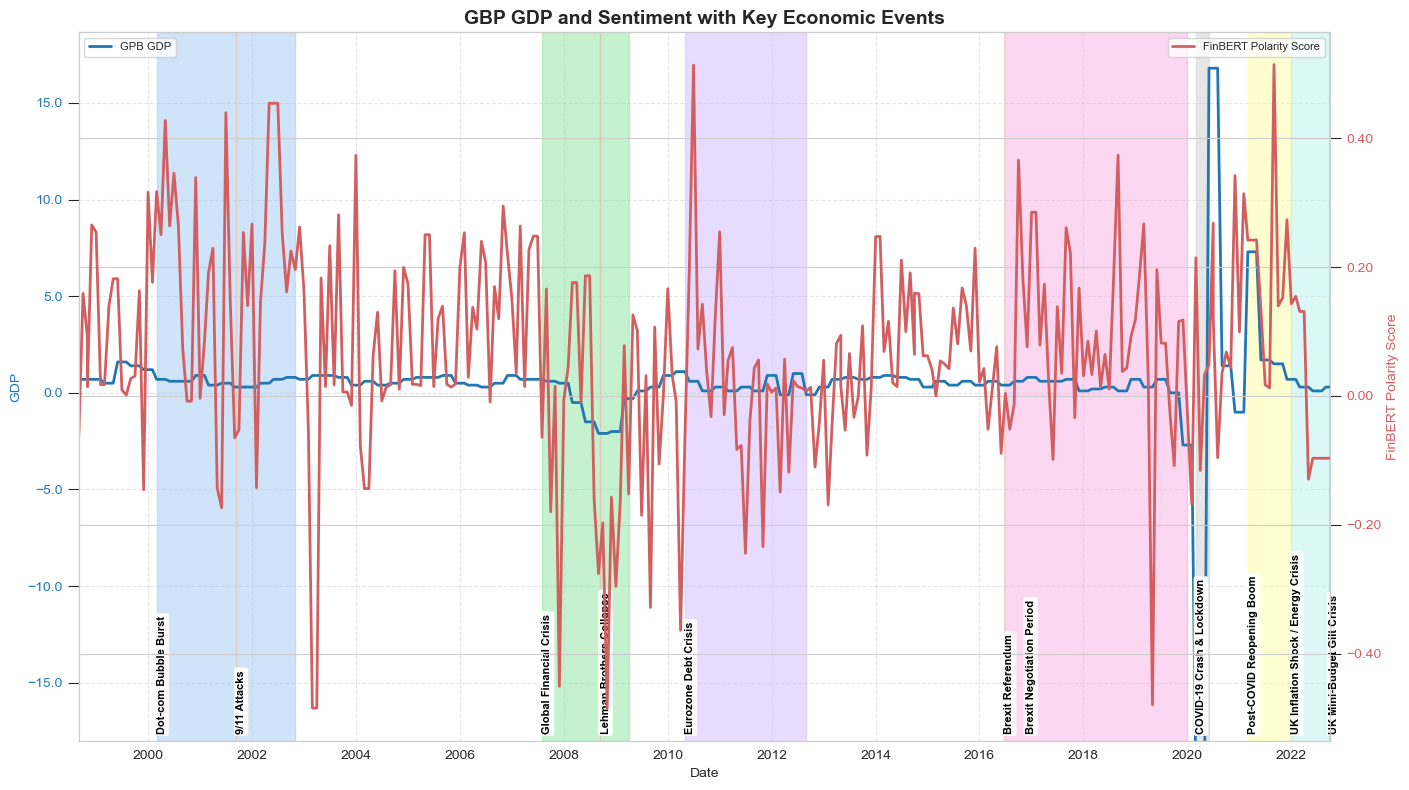

In [30]:
# Filter data from 1 Sep 1998 onwards
start_date = pd.to_datetime('1998-09-01')
df_plot = df_uk_full[df_uk_full['Date'] >= start_date].copy()
df_plot = df_plot.dropna(subset=['gdp_GDP', 'polarity_score_finbert'])

# Define the key economic events dictionary
events = {
    'Early 1990s Recession (UK)': {'Start': '1990-07-01', 'End': '1992-09-30'},
    'Black Wednesday (ERM Crisis)': {'Start': '1992-09-16', 'End': '1992-09-16'},
    'BoE Operational Independence': {'Start': '1997-05-06', 'End': '1997-05-06'},
    'Dot-com Bubble Burst': {'Start': '2000-03-01', 'End': '2002-10-31'},
    '9/11 Attacks': {'Start': '2001-09-11', 'End': '2001-09-11'},
    'Global Financial Crisis (GFC)': {'Start': '2007-08-01', 'End': '2009-03-31'},
    'Lehman Brothers Collapse': {'Start': '2008-09-15', 'End': '2008-09-15'},
    'Eurozone Debt Crisis': {'Start': '2010-05-01', 'End': '2012-08-31'},
    'Brexit Referendum': {'Start': '2016-06-23', 'End': '2016-06-23'},
    'Brexit Negotiation Period': {'Start': '2016-07-01', 'End': '2019-12-31'},
    'COVID-19 Crash & Lockdown': {'Start': '2020-03-01', 'End': '2020-05-31'},
    'Post-COVID Reopening Boom': {'Start': '2021-03-01', 'End': '2021-12-31'},
    'UK Inflation Shock / Energy Crisis': {'Start': '2022-01-01', 'End': '2022-12-31'},
    'UK Mini-Budget Gilt Crisis': {'Start': '2022-09-23', 'End': '2022-10-14'}
}

# Apply a Seaborn style
sns.set_style('whitegrid')

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 8))

# --- CPI Plot ---
color_gdp = '#2077b4'
ax1.set_xlabel('Date', fontsize=10)
ax1.set_ylabel('GDP', color=color_gdp, fontsize=10)
ax1.plot(df_plot['Date'], df_plot['gdp_GDP'], color=color_gdp, label='GPB GDP', linewidth=2)
ax1.tick_params(axis='y', labelcolor=color_gdp, size=8)

# --- Sentiment Score Plot ---
ax2 = ax1.twinx()
color_sentiment = '#d35e60'
ax2.set_ylabel('FinBERT Polarity Score', color=color_sentiment, fontsize=10)
ax2.plot(df_plot['Date'], df_plot['polarity_score_finbert'], color=color_sentiment, label='FinBERT Polarity Score', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color_sentiment, size=8)

# --- Event Shading and Labels ---
# Use a Seaborn palette for event colors
event_colors = sns.color_palette('pastel', n_colors=len(events)).as_hex()
label_y_offset = 0.01
label_fontsize = 8
i = 0

label_positions = {}
brexit_referendum_end = pd.to_datetime(events['Brexit Referendum']['End'])
label_positions['Brexit Referendum'] = brexit_referendum_end
label_positions['Brexit Negotiation Period'] = brexit_referendum_end + pd.Timedelta(days=150)

# Set the y position for the labels to be at the bottom of the chart (y=0)
event_y_position = 0

for event_name, dates in events.items():
    start = pd.to_datetime(dates['Start'])
    end = pd.to_datetime(dates['End'])

    if end >= start_date:
        display_start = max(start, start_date)
        ax1.axvspan(display_start, end, color=event_colors[i % len(event_colors)], alpha=0.5)
        label_x_pos = label_positions.get(event_name, display_start)

        # Add labels just above the x-axis using axes coordinates
        ax1.text(label_x_pos, 0.01,
                 event_name.split('(')[0].strip(),
                 rotation=90,
                 fontsize=label_fontsize,
                 color='black',
                 fontweight='bold',
                 ha='left',
                 va='bottom',
                 transform=ax1.get_xaxis_transform(),
                 zorder=5,
                 bbox=dict(
                 facecolor='white',     # background color
                 alpha=1,              # opacity (0 = transparent, 1 = solid)
                 edgecolor='none',       # remove border
                 boxstyle='round,pad=0.2'  # optional rounded corners
                 ))

        i += 1

# --- Title and Layout ---
plt.title('GBP GDP and Sentiment with Key Economic Events', fontsize=14, fontweight='bold')
fig.tight_layout()

# --- X-Axis Formatting ---
ax1.xaxis.set_major_locator(mdates.YearLocator(2))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45, ha='right', fontsize=8)

# --- Y-Axis Formatting ---
ax1.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.1f}'))
ax2.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.2f}'))

# --- Legends ---
ax1.legend(loc='upper left', fontsize=8)
ax2.legend(loc='upper right', fontsize=8)

# --- Grid and Limits ---
ax1.grid(True, which='major', linestyle='--', alpha=0.5)
ax1.set_xlim(start_date, df_plot['Date'].max())
ax1.set_ylim(bottom=-18)  # Ensure the y-axis starts at 0

plt.show()

### Visual analysis shows that GBP's GDP does not tend to move in relation to finBERT sentiment scores. Sentiment can vary wildly while GDP remains relitively within a simular range. There is a large dip in sentiment which predates teh covid-19 lockdown which limited economic activity. It is known that the UK government made the decision to lockdown due to public safety needs, rather than GDP dipping because of something BoE said in a speech. 

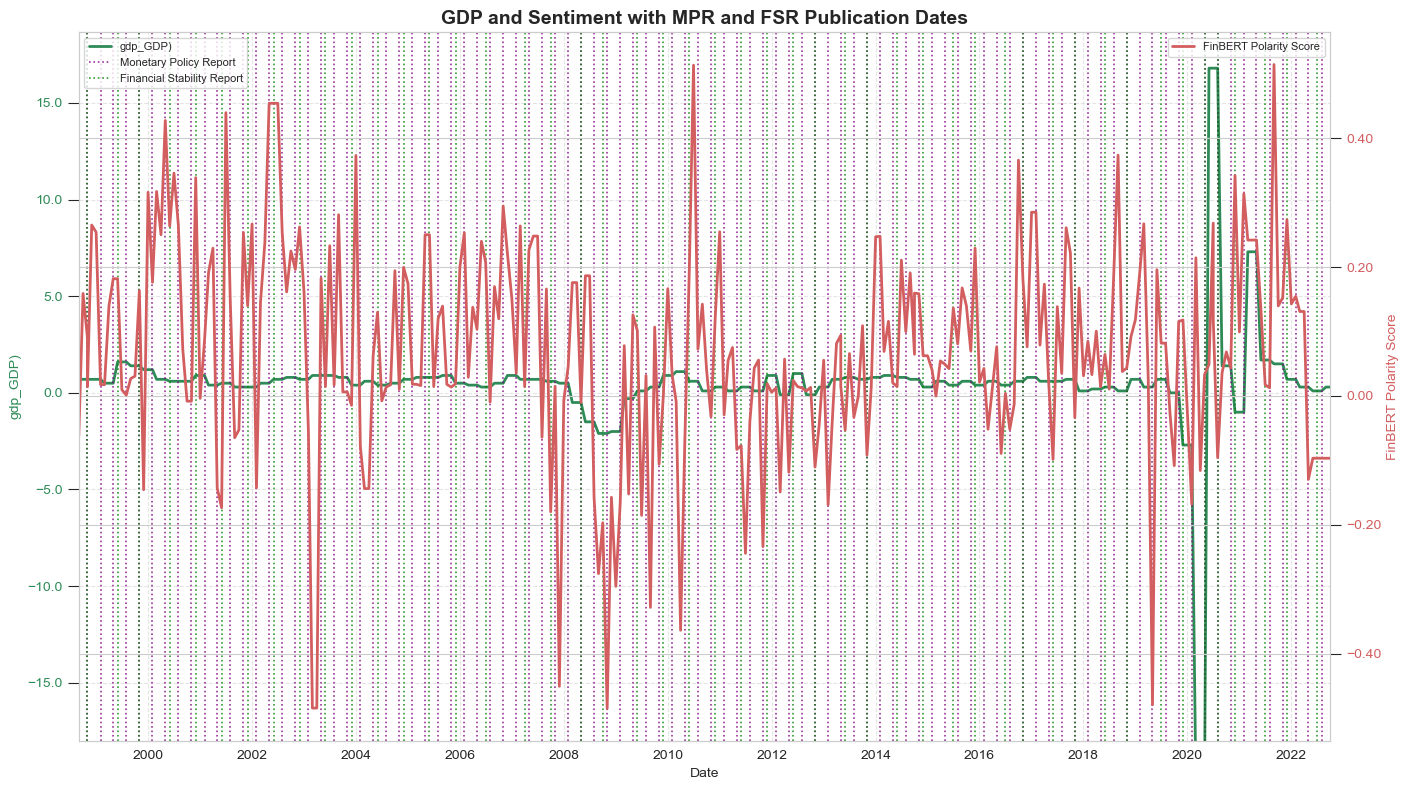

In [32]:
start_date = pd.to_datetime('1998-09-01')
df_plot2 = df_uk_full[df_uk_full['Date'] >= start_date].copy()
df_plot2 = df_plot2.dropna(subset=['CPI', 'polarity_score_finbert'])

# --- Load Publication Dates from repo ---
mpr_url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/report_publication_dates/mpr_dates_cleaned.csv'
fsr_url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/report_publication_dates/fsr_dates_cleaned.csv'

mpr_dates = pd.read_csv(mpr_url, parse_dates=["date"])
fsr_dates = pd.read_csv(fsr_url, parse_dates=["date"])

# --- Apply Style ---
sns.set_style('whitegrid')

# --- Plot Setup ---
fig, ax1 = plt.subplots(figsize=(14, 8))

# CPI Line (Left Axis)
color_cpi = '#2E8B57'
ax1.set_xlabel('Date', fontsize=10)
ax1.set_ylabel('gdp_GDP)', color=color_cpi, fontsize=10)
ax1.plot(df_plot2['Date'], df_plot2['gdp_GDP'], color=color_cpi, label='gdp_GDP)', linewidth=2)
ax1.tick_params(axis='y', labelcolor=color_cpi, size=8)

# Sentiment Line (Right Axis)
ax2 = ax1.twinx()
color_sentiment = '#d35e60'
ax2.set_ylabel('FinBERT Polarity Score', color=color_sentiment, fontsize=10)
ax2.plot(df_plot2['Date'], df_plot2['polarity_score_finbert'], color=color_sentiment, label='FinBERT Polarity Score', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color_sentiment, size=8)

# --- NEW: Add MPR and FSR Vertical Lines ---

# MPR: Purple Dotted Lines
for date in mpr_dates['date']:
    ax1.axvline(x=date, color='purple', linestyle=':', linewidth=1.2, alpha=0.8, label='Monetary Policy Report')

# FSR: Green Dotted Lines
for date in fsr_dates['date']:
    ax1.axvline(x=date, color='green', linestyle=':', linewidth=1.2, alpha=0.8, label='Financial Stability Report')

# --- Title and Layout ---
plt.title('GDP and Sentiment with MPR and FSR Publication Dates', fontsize=14, fontweight='bold')
fig.tight_layout()

# --- X-Axis Formatting ---
ax1.xaxis.set_major_locator(mdates.YearLocator(2))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45, ha='right', fontsize=8)

# --- Y-Axis Formatting ---
ax1.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.1f}'))
ax2.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.2f}'))

# --- Deduplicated Legend ---
handles, labels = ax1.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
ax1.legend(unique_labels.values(), unique_labels.keys(), loc='upper left', fontsize=8)

# --- Legend for FinBERT on Right Axis ---
handles2, labels2 = ax2.get_legend_handles_labels()
unique_labels2 = dict(zip(labels2, handles2))
ax2.legend(unique_labels2.values(), unique_labels2.keys(), loc='upper right', fontsize=8)

# --- Grid and Limits ---
ax1.grid(True, which='major', linestyle='--', alpha=0.5)
ax1.set_xlim(start_date, df_plot['Date'].max())
ax1.set_ylim(bottom=-18)

plt.show()

### Drop unncessary columns to reduce the number of variables to be explored

In [34]:
# Drop unnecessary columns. Alters the original "df_uk" dataframe to reflected dropped columns
df_uk_focused = df_uk_full.drop(['price_02_Price', 'price_05_Price','price_05_Total Return (Gross, Unhedged)','price_10_Price','price_10_Total Return (Gross, Unhedged)'], axis=1)

# View column names.
df_uk_focused.columns

Index(['Date', 'ftse_250_price', 'ftse_250_total_return', 'base_rate', 'CPI',
       'ftse_350_Price', 'ftse_350_Total Return (Gross, Unhedged)',
       'price_02_Total Return (Gross, Unhedged)', 'confidence_score',
       'unemployment_rate', 'wage_growth_rate', 'gdp_GDP',
       'polarity_score_finbert'],
      dtype='object')

In [35]:
df_uk_focused.head()

,Date,ftse_250_price,ftse_250_total_return,base_rate,CPI,ftse_350_Price,"ftse_350_Total Return (Gross, Unhedged)","price_02_Total Return (Gross, Unhedged)",confidence_score,unemployment_rate,wage_growth_rate,gdp_GDP,polarity_score_finbert
0,1989-12-01,2661.760010,803.789978,14.713333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN
1,1990-01-01,2591.129883,783.250000,14.630000,5.7,1165.829956,725.320007,NaN,-19.0,6.9,NaN,0.5,NaN
2,1990-02-01,2463.879883,746.010010,14.546667,5.9,1121.469971,700.580017,NaN,-24.0,6.9,NaN,0.5,NaN
3,1990-03-01,2437.370117,741.700012,14.463333,6.0,1115.699951,701.400024,NaN,-35.0,6.9,NaN,0.7,NaN
4,1990-04-01,2285.780029,701.510010,14.380000,6.4,1044.619995,660.010010,NaN,-31.0,6.9,NaN,0.7,NaN


### Rename columns

In [37]:
# Rename the column headers.
df_uk_focused.rename(columns={
    
    'base_rate': 'BoE_base_rate',
    'CPI': 'CPI_pct_change',
    'gdp_GDP': 'GDP_pct_change',
    'price_02_Total Return (Gross, Unhedged)': '0-2yr_gilts_TReturns',
    'polarity_score_finbert':'finbert_sentiment_score'
}, inplace=True)

# View column names.
df_uk_focused.columns

Index(['Date', 'ftse_250_price', 'ftse_250_total_return', 'BoE_base_rate',
       'CPI_pct_change', 'ftse_350_Price',
       'ftse_350_Total Return (Gross, Unhedged)', '0-2yr_gilts_TReturns',
       'confidence_score', 'unemployment_rate', 'wage_growth_rate',
       'GDP_pct_change', 'finbert_sentiment_score'],
      dtype='object')

In [38]:
# Define the new order of the columns
new_column_order = [
    'Date', 'GDP_pct_change', 'BoE_base_rate', 'CPI_pct_change', 'finbert_sentiment_score', 'confidence_score',
    'unemployment_rate', 'wage_growth_rate',
    'ftse_250_total_return',  '0-2yr_gilts_TReturns'
]

# Reindex the DataFrame with the new column order
df_uk_focused = df_uk_focused[new_column_order]

df_uk_focused.head()

,Date,GDP_pct_change,BoE_base_rate,CPI_pct_change,finbert_sentiment_score,confidence_score,unemployment_rate,wage_growth_rate,ftse_250_total_return,0-2yr_gilts_TReturns
0,1989-12-01,0.5,14.713333,NaN,NaN,NaN,NaN,NaN,803.789978,NaN
1,1990-01-01,0.5,14.630000,5.7,NaN,-19.0,6.9,NaN,783.250000,NaN
2,1990-02-01,0.5,14.546667,5.9,NaN,-24.0,6.9,NaN,746.010010,NaN
3,1990-03-01,0.7,14.463333,6.0,NaN,-35.0,6.9,NaN,741.700012,NaN
4,1990-04-01,0.7,14.380000,6.4,NaN,-31.0,6.9,NaN,701.510010,NaN


# Correlation analysis

### Create pairplot for visual correlation analysis

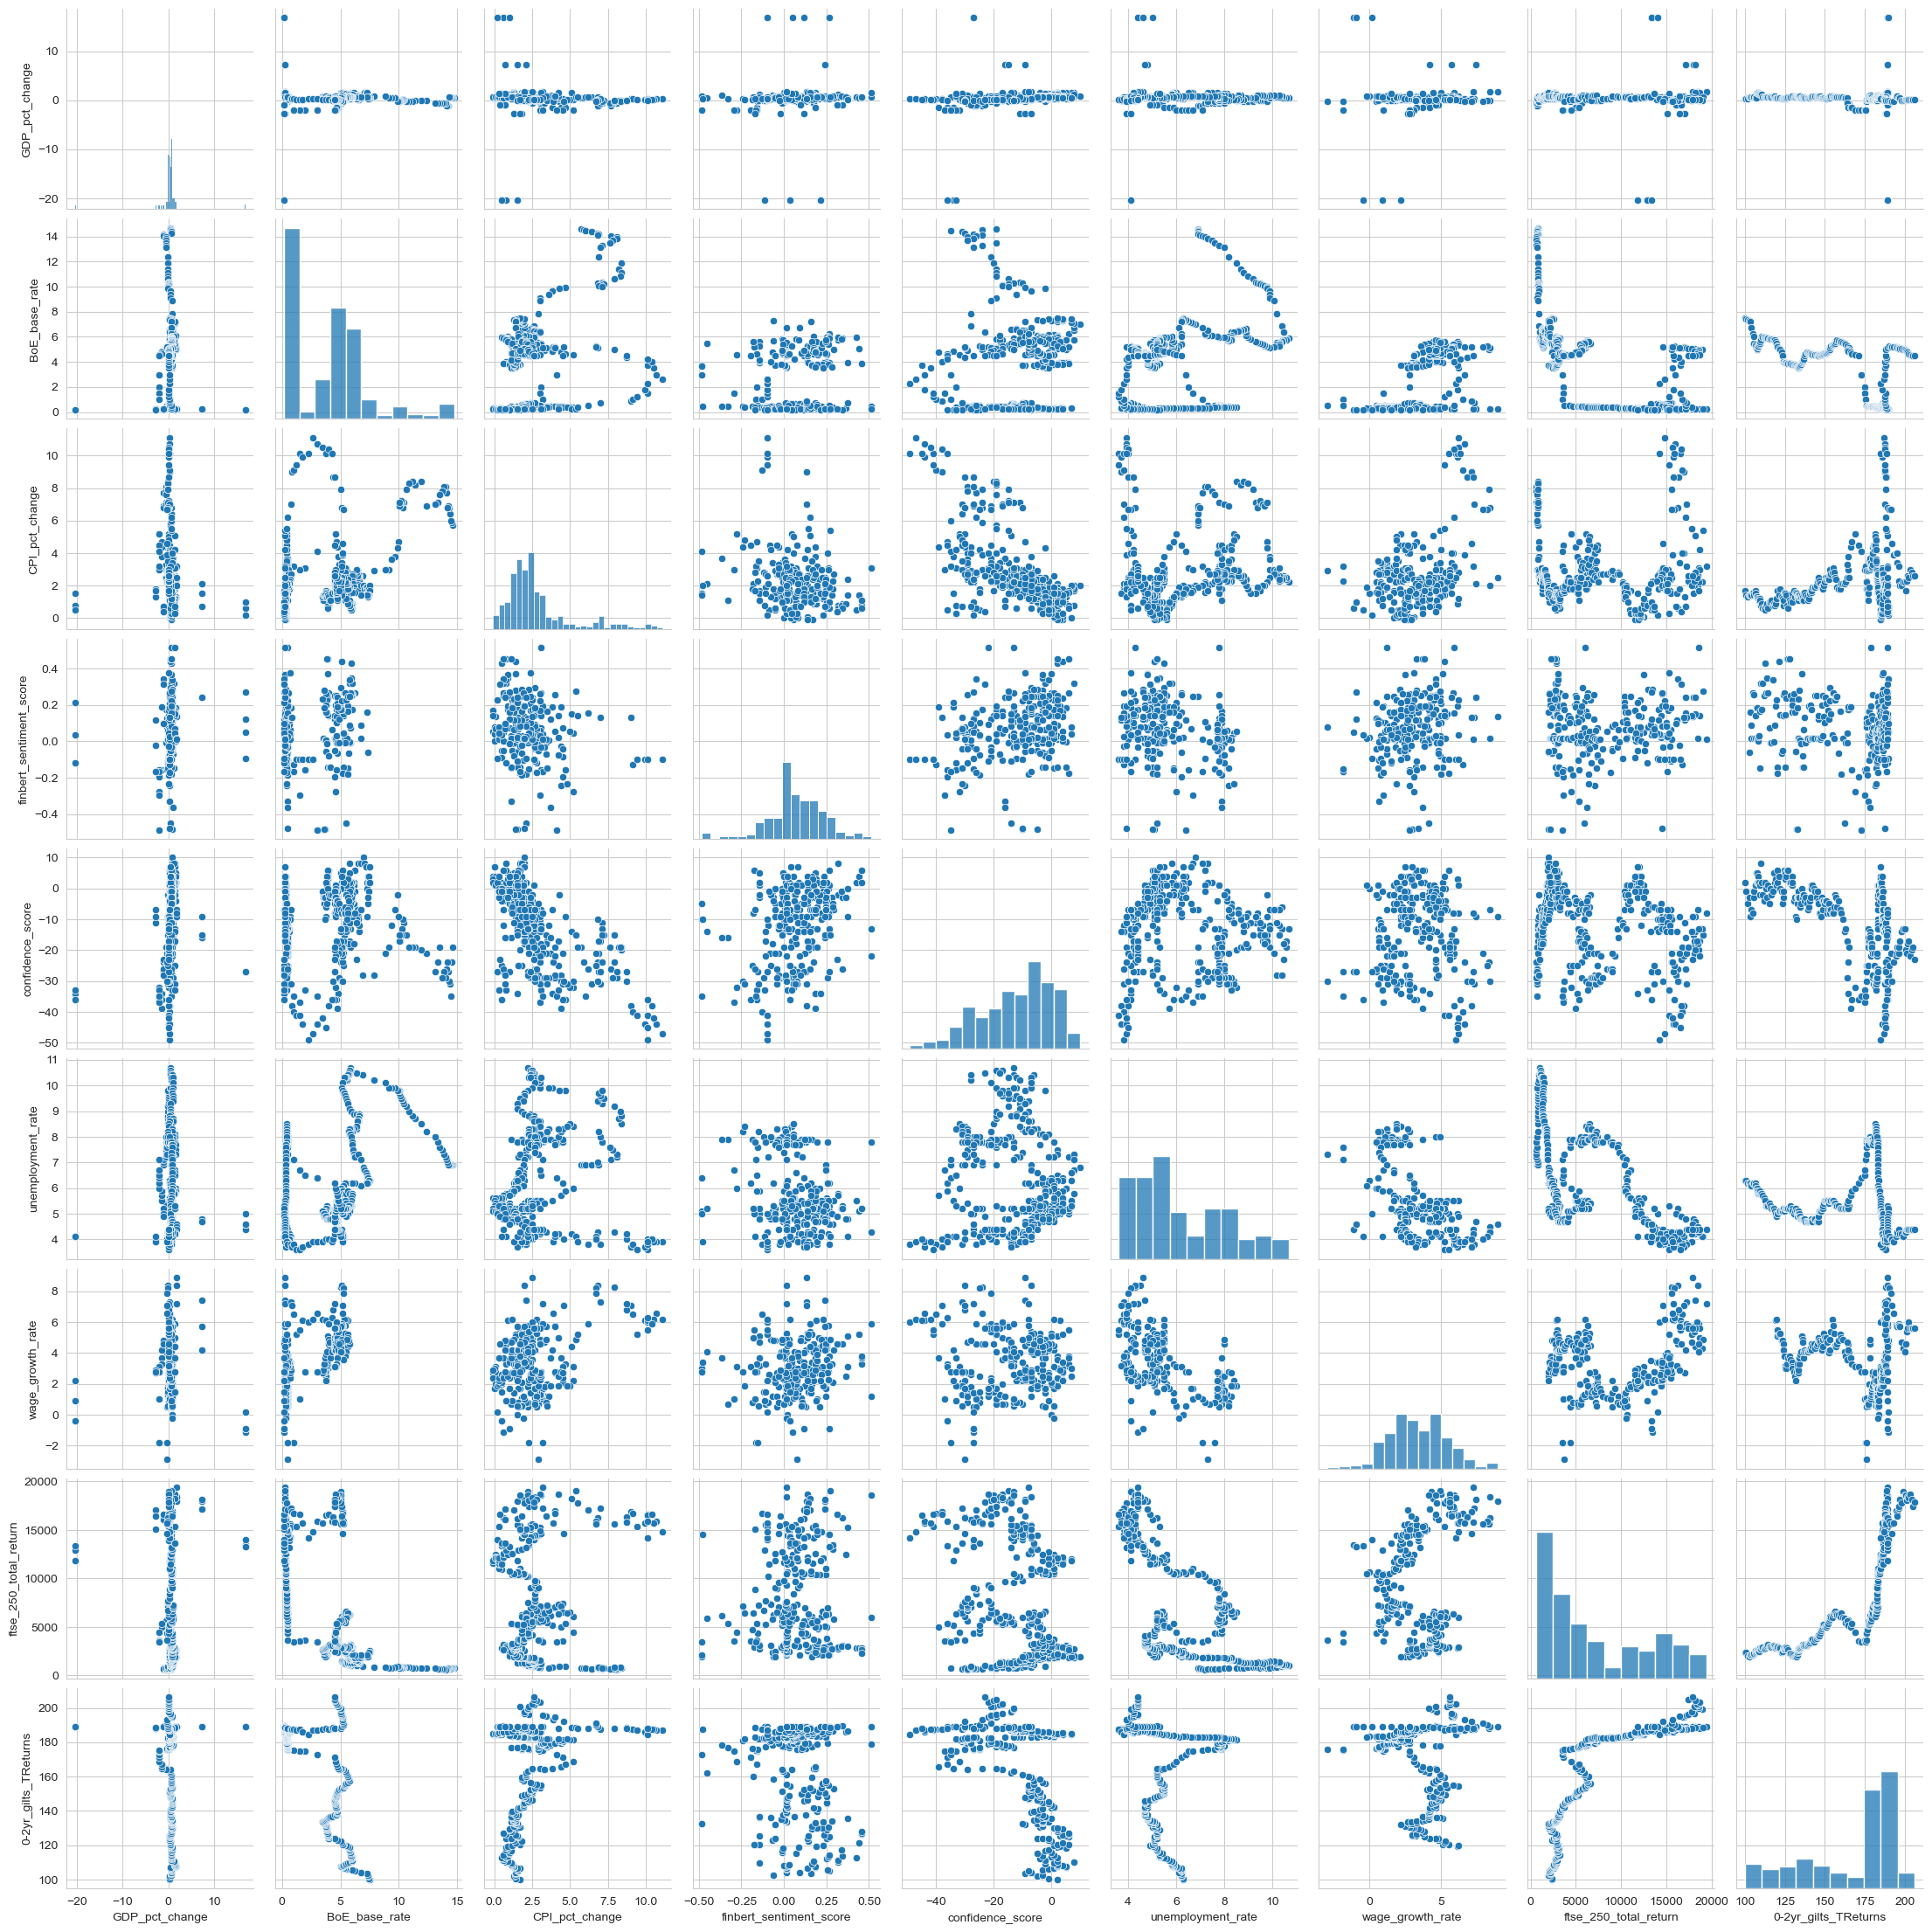

In [41]:
# Visualise the dataframe to pick out any direct relationships or specific distribution characteristics
sns.pairplot(df_uk_focused)

### Create correlation matrices

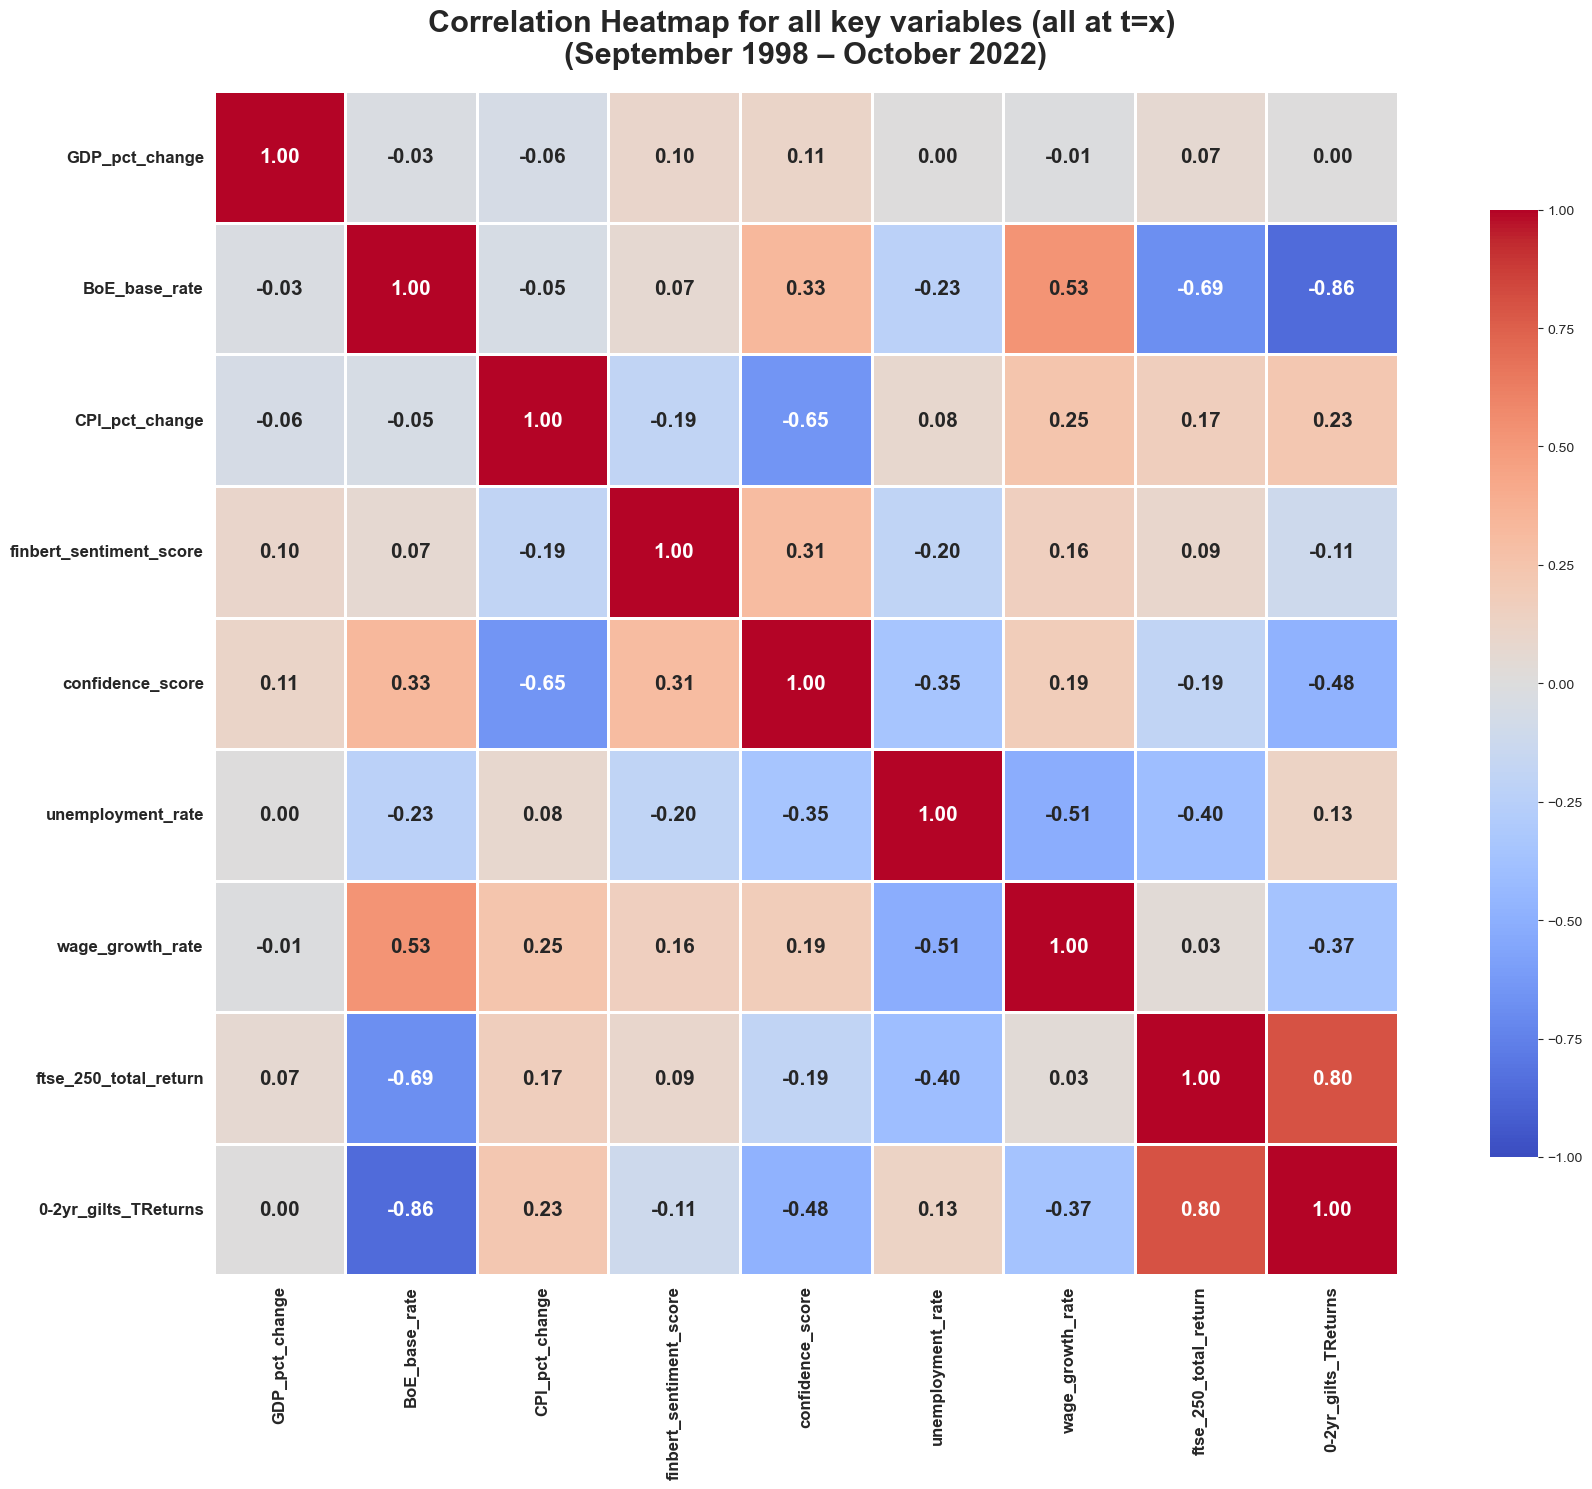

In [43]:
# Ensure 'Date' column is datetime
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'])
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], format='%d-%m-%y', errors='coerce')

# Filter the DataFrame to 09/1998 – 10/2022
start_date = "1998-09-01"
end_date = "2022-10-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)]

# Select only numeric columns and drop rows with missing values
numeric_data = filtered_df.select_dtypes(include='number').dropna()

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(20, 15))
heatmap = sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm', 
    linewidths=1, 
    linecolor='white', 
    annot_kws={"size": 15, "weight": "bold"},
    cbar_kws={"shrink": 0.8},
    vmin=-1, 
    vmax=1,
    square=True
)

plt.title('Correlation Heatmap for all key variables (all at t=x) \n(September 1998 – October 2022)', 
          fontsize=22, fontweight='bold', pad=20)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()

plt.show()

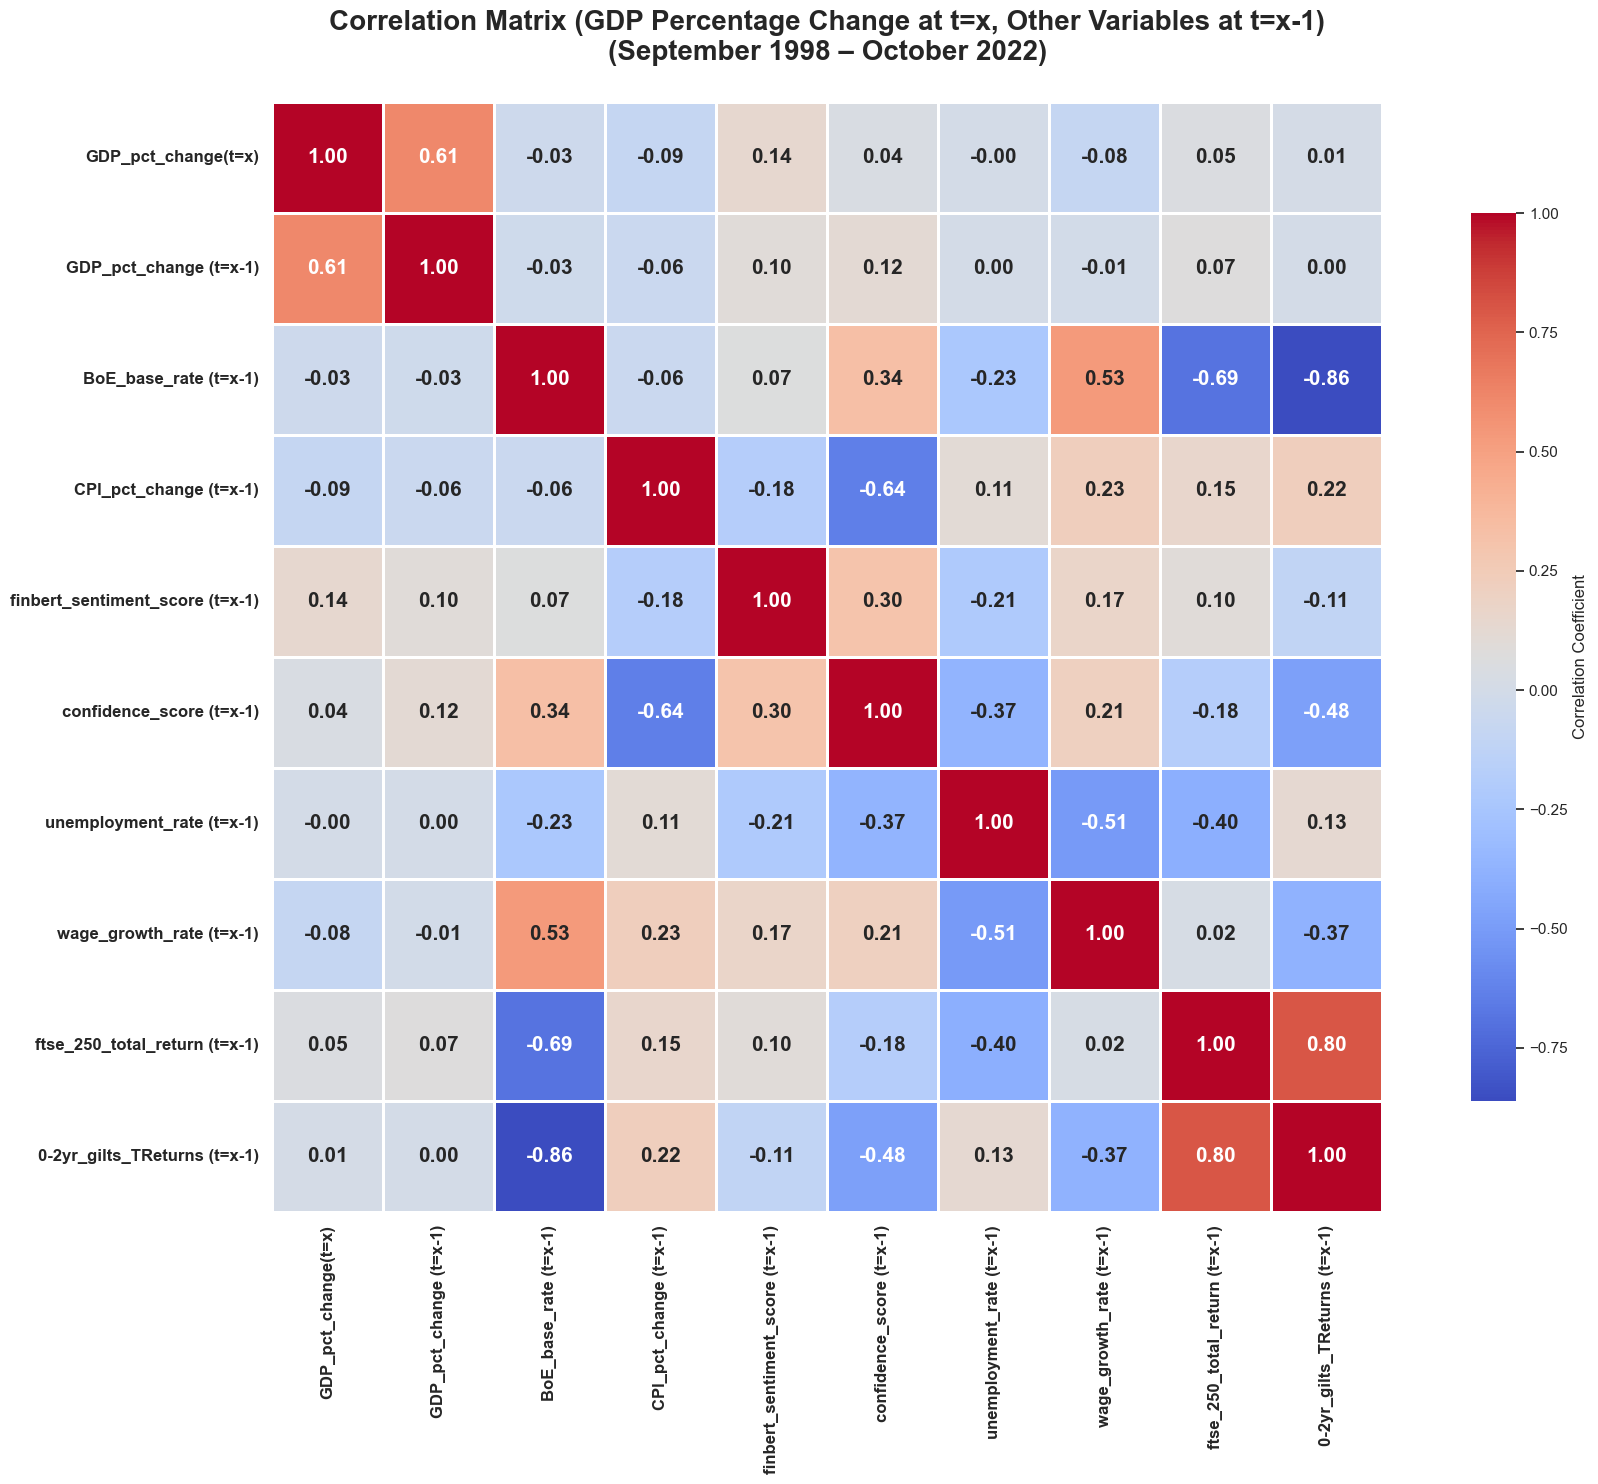

In [44]:
# Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])  # Drop rows with invalid dates

# from September 1998 to October 2022
start_date = "1998-09-01"
end_date = "2022-10-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)].copy()

# Define columns 
columns_of_interest = [ 'GDP_pct_change', 'BoE_base_rate', 'CPI_pct_change', 'finbert_sentiment_score', 'confidence_score',
    'unemployment_rate', 'wage_growth_rate', 'ftse_250_total_return', '0-2yr_gilts_TReturns']

# Create correlation DataFrame
correlation_df = filtered_df[['GDP_pct_change']].copy()  # CPI pct change at time t
correlation_df.rename(columns={'GDP_pct_change': 'GDP_pct_change(t=x)'}, inplace=True)

# Add t+1 (1 month lag) for all other variables
for col in columns_of_interest:
    if col in filtered_df.columns:
        correlation_df[f"{col} (t=x-1)"] = filtered_df[col].shift(1)

#Drop missing values from lagging
correlation_df.dropna(inplace=True)

# Compute correlation matrix
correlation_matrix = correlation_df.corr()

#Plot the heatmap
plt.figure(figsize=(20, 15))
sns.set(style="white")

heatmap = sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 15, "weight": "bold"},
    linewidths=1,
    linecolor='white',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
)

plt.title(
    "Correlation Matrix (GDP Percentage Change at t=x, Other Variables at t=x-1)\n(September 1998 – October 2022)",
    fontsize=20,
    fontweight='bold',
    pad=30
)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()
plt.show()


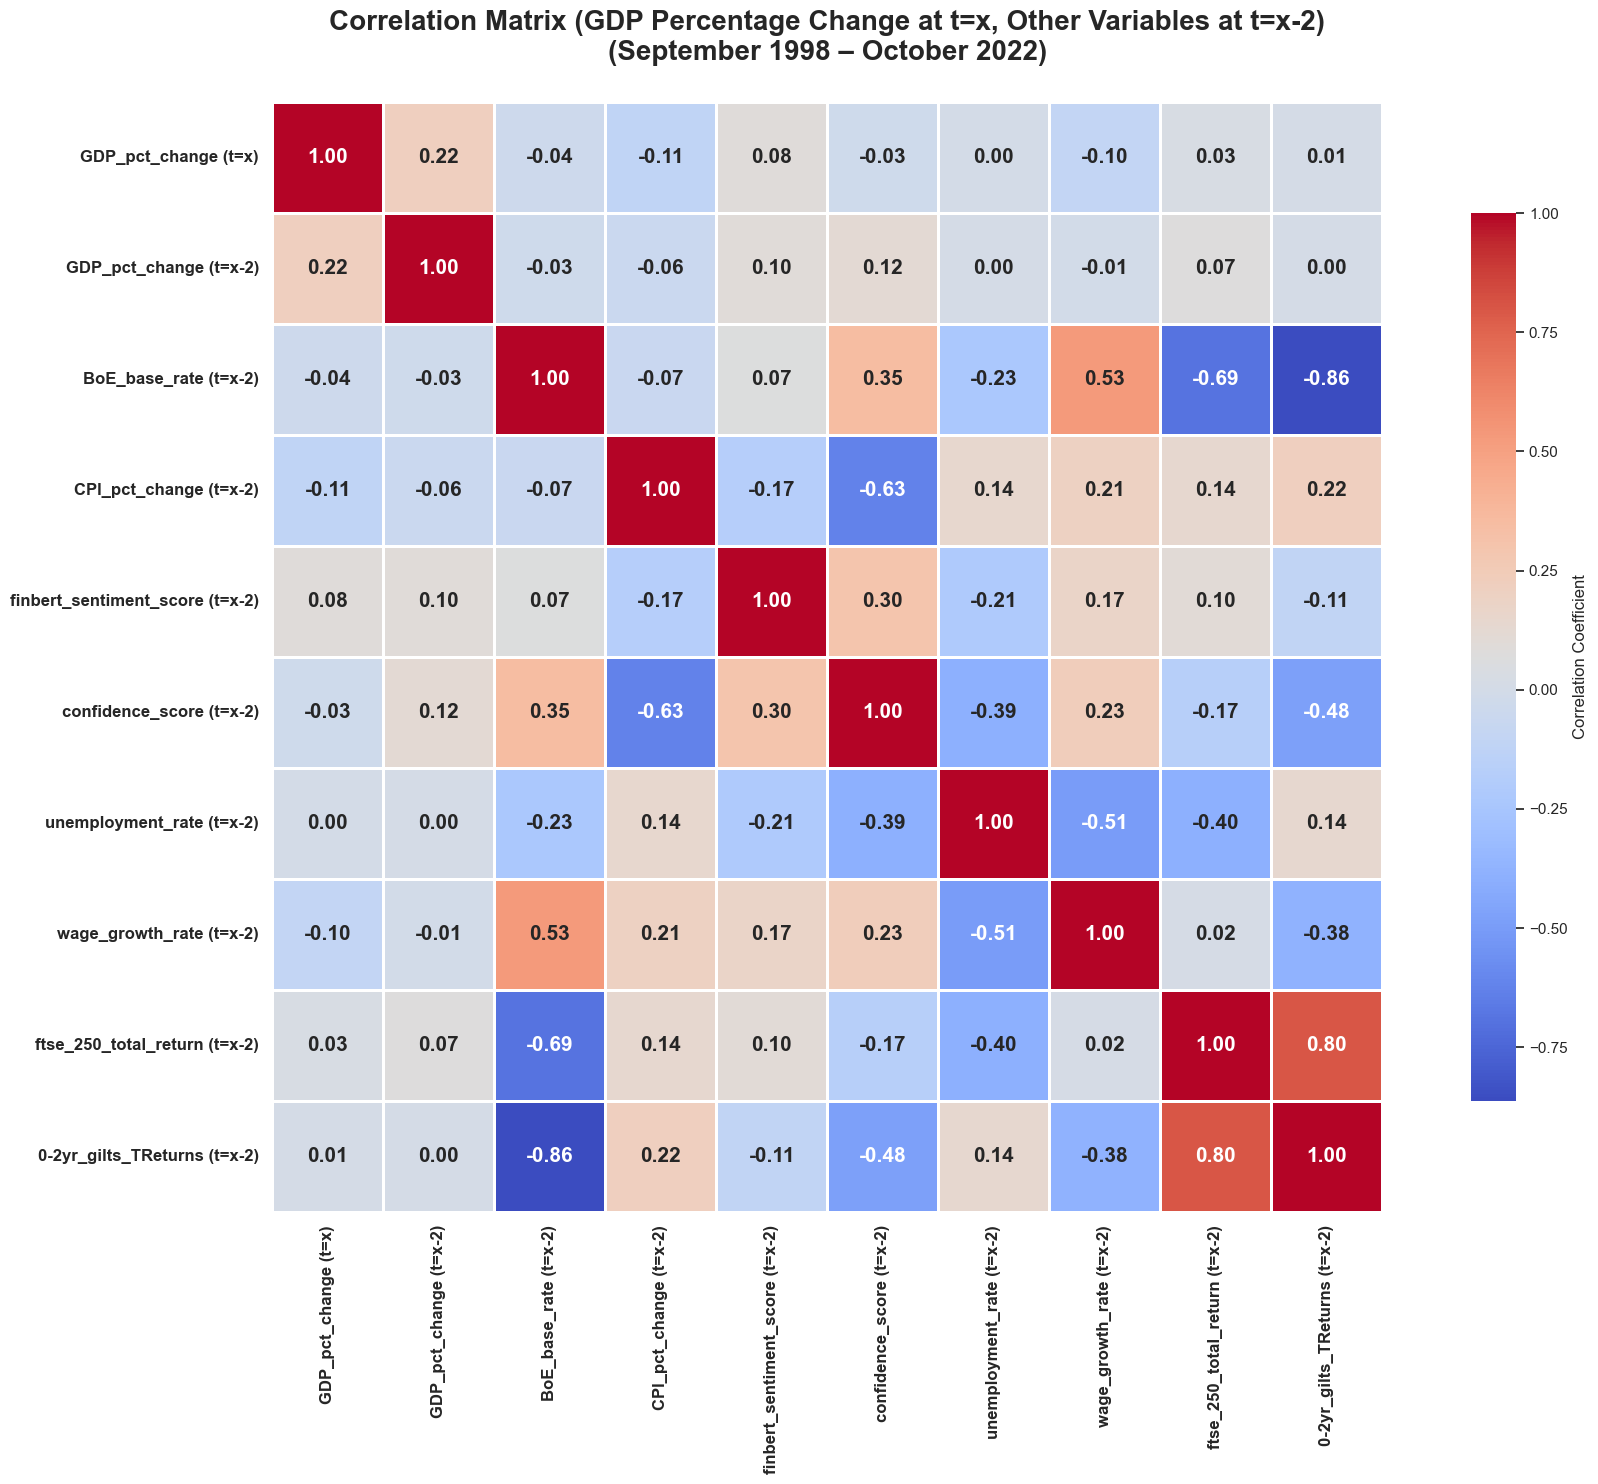

In [45]:
# Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])  # Drop rows with invalid dates

# from September 1998 to October 2022
start_date = "1998-09-01"
end_date = "2022-10-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)].copy()

# Define columns 
columns_of_interest = [ 'GDP_pct_change', 'BoE_base_rate', 'CPI_pct_change', 'finbert_sentiment_score', 'confidence_score',
    'unemployment_rate', 'wage_growth_rate',
    'ftse_250_total_return', '0-2yr_gilts_TReturns']

# Create correlation DataFrame
correlation_df = filtered_df[['GDP_pct_change']].copy()  # CPI pct change at time t
correlation_df.rename(columns={'GDP_pct_change': 'GDP_pct_change (t=x)'}, inplace=True)

# Add t+2 (2 months lag) for all other variables
for col in columns_of_interest:
    if col in filtered_df.columns:
        correlation_df[f"{col} (t=x-2)"] = filtered_df[col].shift(2)

#Drop missing values from lagging
correlation_df.dropna(inplace=True)

# Compute correlation matrix
correlation_matrix = correlation_df.corr()

#Plot the heatmap
plt.figure(figsize=(20, 15))
sns.set(style="white")

heatmap = sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 15, "weight": "bold"},
    linewidths=1,
    linecolor='white',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
)

plt.title(
    "Correlation Matrix (GDP Percentage Change at t=x, Other Variables at t=x-2)\n(September 1998 – October 2022)",
    fontsize=20,
    fontweight='bold',
    pad=30
)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()
plt.show()

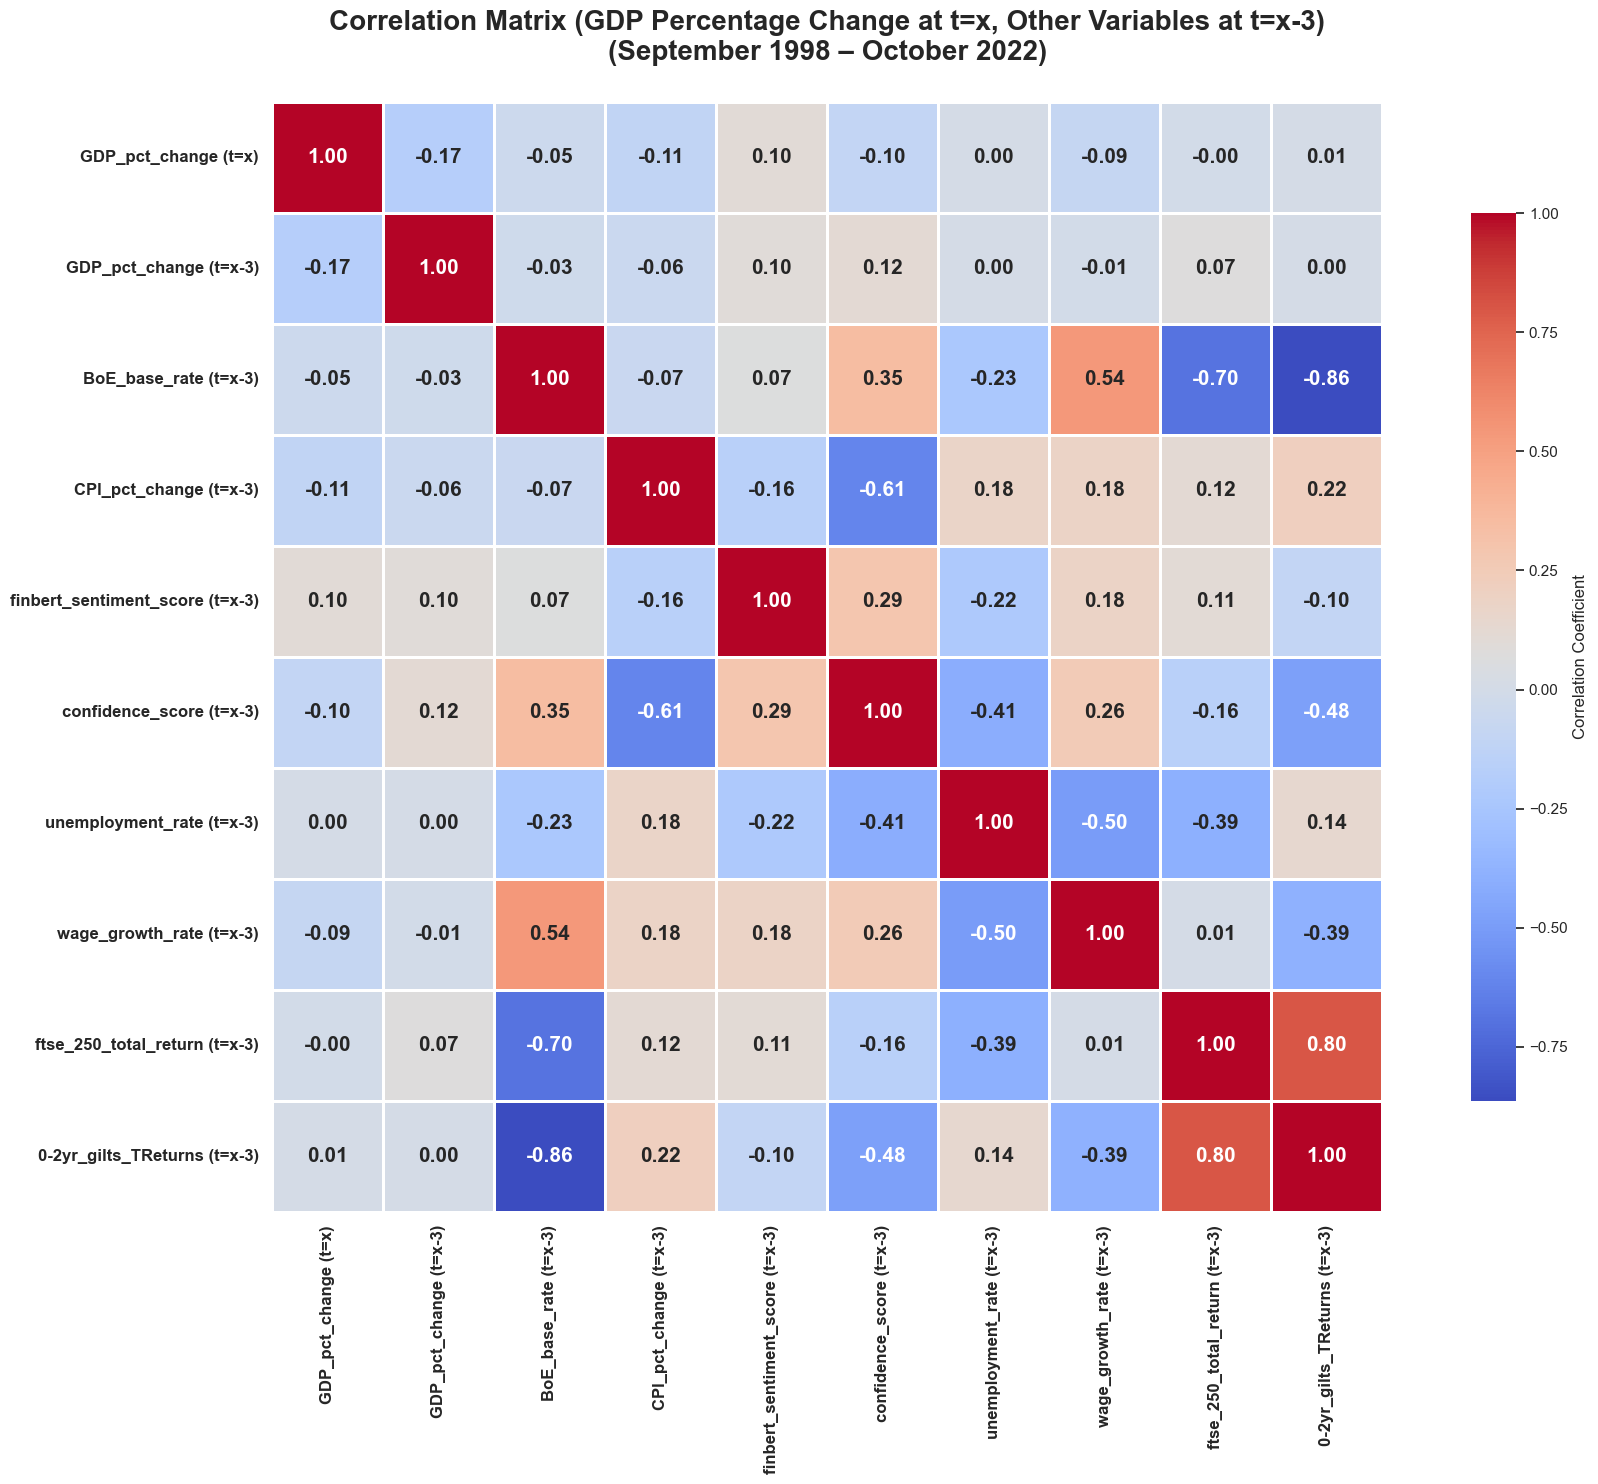

In [64]:
# Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])  # Drop rows with invalid dates

# from September 1998 to October 2022
start_date = "1998-09-01"
end_date = "2022-10-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)].copy()

# Define columns 
columns_of_interest = [ 'GDP_pct_change', 'BoE_base_rate', 'CPI_pct_change', 'finbert_sentiment_score', 'confidence_score',
    'unemployment_rate', 'wage_growth_rate', 
    'ftse_250_total_return', '0-2yr_gilts_TReturns']

# Create correlation DataFrame
correlation_df = filtered_df[['GDP_pct_change']].copy()  # CPI pct change at time t
correlation_df.rename(columns={'GDP_pct_change': 'GDP_pct_change (t=x)'}, inplace=True)

# Add t+3 (3 months lag) for all other variables
for col in columns_of_interest:
    if col in filtered_df.columns:
        correlation_df[f"{col} (t=x-3)"] = filtered_df[col].shift(3)

#Drop missing values from lagging
correlation_df.dropna(inplace=True)

# Compute correlation matrix
correlation_matrix = correlation_df.corr()

#Plot the heatmap
plt.figure(figsize=(20, 15))
sns.set(style="white")

heatmap = sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 15, "weight": "bold"},
    linewidths=1,
    linecolor='white',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
)

plt.title(
    "Correlation Matrix (GDP Percentage Change at t=x, Other Variables at t=x-3)\n(September 1998 – October 2022)",
    fontsize=20,
    fontweight='bold',
    pad=30
)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()
plt.show()


### From the above matrices, the variables that best correlate with CPI_pct_change at t=0 are CPI_pct_change (t-1), confidence_score (t=0), wage_growth (t-3), ftse_250_total_returns (t-3) and BoE_base_rate (t-3)

### Therefore these will be used for an initial Multiple Linear Regression analysis to assess predictive ability

# Multiple linear regression: Inflation vs Lagged Inflation, Consumer Confidence Score, Wage Growth and FTSE250 Total Returns

### Prepare regression dataframe

In [192]:
# Step 1: Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])

start_date = "1998-09-01"
end_date = "2022-10-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)].copy()

# Step 2: Create new DataFrame for regression
regression_df = pd.DataFrame()
regression_df['Date'] = filtered_df['Date']  
regression_df['GDP_pct_change (t=x)'] = filtered_df['GDP_pct_change']
regression_df['GDP_pct_change (t=x-1)'] = filtered_df['GDP_pct_change'].shift(1)
regression_df['BoE_base_rate (t=x-1)'] = filtered_df['BoE_base_rate'].shift(1)
regression_df['CPI_pct_change (t=x-1)'] = filtered_df['CPI_pct_change'].shift(1)
regression_df['confidence_score (t=x-1)'] = filtered_df['confidence_score'].shift(1)
regression_df['ftse_250_total_return (t=x-1)'] = filtered_df['ftse_250_total_return'].shift(1)



# Step 3: Drop rows with missing values due to shifting
regression_df.dropna(inplace=True)

# Step 4: View correlation or run regression
correlation_matrix = regression_df.drop(columns='Date').corr()
display(correlation_matrix)

,GDP_pct_change (t=x),GDP_pct_change (t=x-1),BoE_base_rate (t=x-1),CPI_pct_change (t=x-1),confidence_score (t=x-1),ftse_250_total_return (t=x-1)
GDP_pct_change (t=x),1.000000,0.609292,-0.008285,-0.091674,0.048675,0.034151
GDP_pct_change (t=x-1),0.609292,1.000000,-0.001866,-0.066228,0.123663,0.049417
BoE_base_rate (t=x-1),-0.008285,-0.001866,1.000000,-0.170655,0.425519,-0.739279
CPI_pct_change (t=x-1),-0.091674,-0.066228,-0.170655,1.000000,-0.661880,0.220145
confidence_score (t=x-1),0.048675,0.123663,0.425519,-0.661880,1.000000,-0.269693
ftse_250_total_return (t=x-1),0.034151,0.049417,-0.739279,0.220145,-0.269693,1.000000


In [193]:
# Define the dependent variable
y = regression_df['GDP_pct_change (t=x)']

# Define the independent variable(s)
X = regression_df[
    ['GDP_pct_change (t=x-1)', 'BoE_base_rate (t=x-1)', 
     'CPI_pct_change (t=x-1)', 'confidence_score (t=x-1)','ftse_250_total_return (t=x-1)']
]

# Specify the model
mlr = LinearRegression()

# Fit the model
mlr.fit(X, y)

LinearRegression()

In [194]:
# Call the predictions for X (array).
mlr.predict(X)

array([  0.7768727 ,   0.96529852,   0.86806104,   0.86806104,
         0.81374771,   0.63961592,   0.59446446,   0.32584808,
         0.37176585,   0.2851645 ,   0.95483586,   1.05687132,
         1.02530717,   0.96841722,   1.00196325,   1.11785852,
         0.93663083,   0.79715297,   0.98204616,   0.87664943,
         0.93591551,   0.77029943,   0.69848036,   0.76863212,
         0.71962615,   0.80295182,   0.642759  ,   0.67719458,
         0.90601381,   0.69114996,   0.8093247 ,   0.43066992,
         0.41265891,   0.23851432,   0.16476692,   0.29635008,
         0.3161739 ,   0.32421582,   0.46163855,   0.47020596,
         0.33053665,  -0.02022332,   0.03557323,   0.22451665,
         0.21674278,   0.30400768,   0.47074508,   0.46181985,
         0.48697941,   0.47791775,   0.47177475,   0.41514874,
         0.4893156 ,   0.55483868,   0.66785042,   0.84367502,
         0.71224858,   0.67565051,   0.69309143,   0.61135154,
         0.65676832,   0.59836478,   0.60586203,   0.73

In [195]:
# Checking the value of R-squared, intercept and coefficients.
# For linear regression models in scikit-learn, the score() method returns the R-squared (coefficient of determination) value.

print("R-squared: ", mlr.score(X, y))
print("Intercept: ", mlr.intercept_)
print("Coefficients:")

list(zip(X, mlr.coef_))

# The zip() function in the list(zip(X, multi.coef_)) line is used to pair corresponding elements from two iterable objects (in this case, X and multi.coef_).

R-squared:  0.38145512190885
Intercept:  0.053138036909925745
Coefficients:


[('GDP_pct_change (t=x-1)', 0.614547288478244),
 ('BoE_base_rate (t=x-1)', 0.06970072603079525),
 ('CPI_pct_change (t=x-1)', -0.25392829993940724),
 ('confidence_score (t=x-1)', -0.031680656934993404),
 ('ftse_250_total_return (t=x-1)', 2.2556171944285225e-05)]

Observation GDP 1998 - 22: 
- R2 is quite low, only 40% of the variation can be explained by the model. The correlatin matrices were quite low so this is in line with those.

Coeffeciets (in order of impact): 
- ('GDP_pct_change (t=x-1)', 0.5693379565150248), - momentum 
- ('finbert_sentiment_score (t=x-1)', 1.982724933375138), - postive tone last mont shows increase in sentiment
- ('BoE_base_rate (t=x-3)', 0.18929569073949196), - = 19 points based on base rate 3 months ago, showing policy impact
- ('CPI_pct_change (t=x-3)', -0.30507236706814184), - inclation shows 30 point slower GDP, showing inflation impacts no growth
- ('confidence_score (t=x-3)', -0.05861709598366666), - tiny and oddly negitive. ignore? 
- ('wage_growth_rate (t=x-2)', -0.08411537064777272), wages may have been rising without productivity as higher wages two months ago show a dip in GDP
- ('ftse_250_total_return (t=x)', 5.0912262874866714e-05)] - nothing really teeny, tiny.

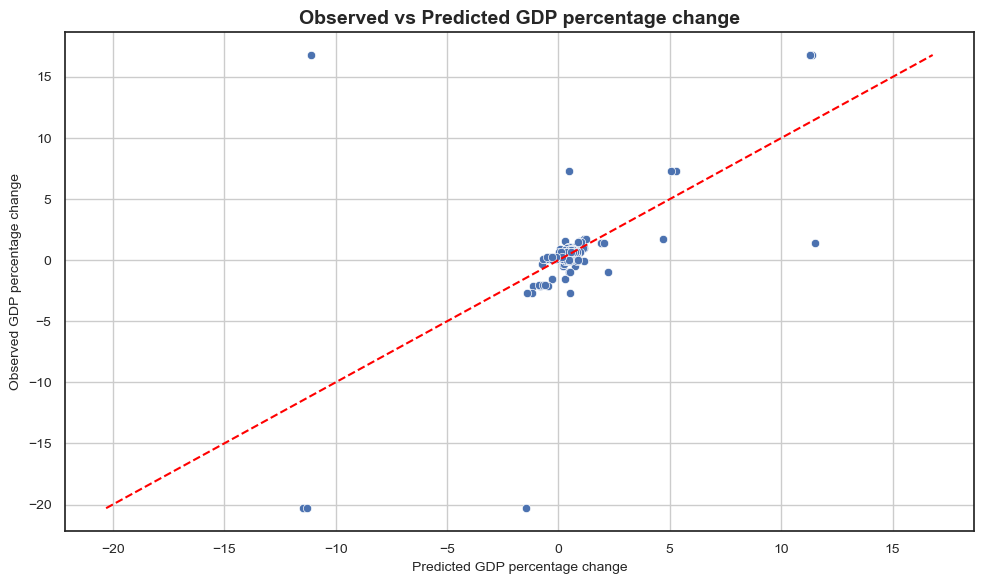

In [215]:
# Plot observed vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=mlr.predict(X), y=regression_df['GDP_pct_change (t=x)'])

# Add Line of best fit (y = x)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')

# Axis labels
plt.xlabel('Predicted GDP percentage change', fontsize=10)
plt.ylabel('Observed GDP percentage change', fontsize=10)

# Title
plt.title('Observed vs Predicted GDP percentage change', fontsize=14, fontweight='bold')

# Tick label size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Final layout
plt.grid(True)
plt.tight_layout()
plt.show()

#### Odd correlation between the predicted and observed GDP percentage change showing it predicts small changes pretty well. This indicates that the model is capturing the overall direction of the relationship.
#### Some big outliers call the reliability of the model into question as it looks like it struggles with outliers 

### Training and testing subsets with MLR

In [218]:
# Create train and test data sets.
# Split the data in 'train' (80%) and 'test' (20%) sets, which is the recommended ratio to prevent overfitting
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [219]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model1 = sm.OLS(y_train, sm.add_constant(x_train)).fit()

# Set the predicted response vector i.e. calculate and store the model's predictions for the target variable (y) based on the test data.
Y_pred = model1.predict(sm.add_constant(x_test)) 
# sm.add_constant(x_test): This adds a constant term (intercept) to the x_test data. This is important because the model was trained with a constant, so it expects input data to also have a constant term for predictions.

# Call a summary of the model.
print_model = model1.summary()

# Print the summary.
print(print_model)  

                             OLS Regression Results                             
Dep. Variable:     GDP_pct_change (t=x)   R-squared:                       0.403
Model:                              OLS   Adj. R-squared:                  0.390
Method:                   Least Squares   F-statistic:                     30.77
Date:                  Sun, 18 May 2025   Prob (F-statistic):           7.13e-24
Time:                          16:33:26   Log-Likelihood:                -526.52
No. Observations:                   234   AIC:                             1065.
Df Residuals:                       228   BIC:                             1086.
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

### <span style="color: orange;"> R-square of 40.3% i.e. when applied to the training data set, 40.3% of the variance in GDP % change (t=0) is explained by the independent variables. As this is macro economics on a long term this isn't bad. 

### <span style="color: orange;"> Adj. R-squared of 0.39

### <span style="color: orange;"> p-values of coefficients indicate that GDP_pct_change (t=x-1), CPI_pct_change (t=x-1) and confidence_score (t=x-1) are signifigant and the others are not. I will rerun it with these factors. 

### <span style="color: orange;"> Durbin-Watson test score is close to 2, which suggests little to no autocorreleation in the residuals.

### <span style="color: orange;"> Jarque-Bera (JB) of 63559.158m, skew of 5.851 and Kurtosis of 82.887 shows non- normal risiduals suggesting extreme outliers (which we know from the time series as we have a huge dip and rise around covid with lockdown and furlough scheme impacting on GDP)

### <span style="color: orange;"> Condition number is of 3.99e+04 is super high, suggesting multicollinearity. To check for multicollinearity measuring the VIF (Variance Inflation Factor) in later steps

In [221]:
# Run regression on the training subset
# Specify the model
mlr = LinearRegression()  

# Fit the model.
mlr.fit(x_train, y_train)

LinearRegression()

In [222]:
# Call the predictions for X in the train set.
y_pred_train = mlr.predict(x_train)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_train)) 

Prediction for test set: [  0.59738658   0.63712576   0.39744729   0.75064057   0.85475605
   0.90443102   0.16384144   0.55146508   0.92273515   0.86307124
   0.35128745   1.09122809   0.84934418   0.50212797   0.55869022
   0.78064392   0.307338     0.90634609  -0.61642582   0.39386349
  11.05704045   0.59070914   0.79637235  -0.55690791   0.34899177
   0.81192439   0.7932313    0.20856869   0.9626822   -1.05474176
   0.67230231   0.47152903   0.38404441   0.45697972   0.75209978
   0.54290984   0.82649049   0.79943564   0.97731948   0.4765814
   0.77294786   0.61298024   0.62424961   0.39137797   0.18000529
  -0.09951794   0.52194299   0.45077495   0.42743221  -0.45278167
   0.42214981   0.4607451    0.83056809   0.51784204  10.92947335
   0.33343791   0.71725171   0.77144657   0.52194299   1.21123638
   0.63886226   0.44090646   0.34335518   0.90981245   0.51334438
   0.53572363   0.35600427   0.58015324   0.54215809   0.59398477
  -0.27812468   0.5089668    0.60616125   0.27733466

In [223]:
# Call the predictions for x in the test set.
y_pred_train = mlr.predict(x_test)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_train))  

Prediction for test set: [ 0.42449907 -1.16541317  0.24536189  1.10498292  0.51464398 -0.36777018
  0.27294019 -0.07322217  0.22555001  0.42646749  0.14618668  5.06628597
  0.19858818  1.0262866   0.81649642  0.41350933  0.40850919  0.62724732
  0.46480857  0.35035755 -0.50659154  0.39903935  1.12635907  0.65952982
  0.51476936  0.93764876  5.31316161  0.80153423  0.60774139  0.72007436
 -0.0451186   0.6670272   0.26475294  0.48641349  0.54865282  0.50297577
  0.61530259  0.80532202  0.07546597  0.71843671  0.10465877  0.36817519
  2.36357776  0.05748443  0.54619217  0.80562887  0.72402701  0.75174556
  1.31586708 -0.07537642  0.89281363  0.3753024   0.73109091  0.81594457
  0.68496825  0.83056809  0.58905808  1.24995039  0.56932855]


In [224]:
# Print the R-squared value.
print(mlr.score(x_test, y_test)*100) 

28.29308543220568


### <span style="color: orange;"> R-square of 28% when the multiple linear regression model based on the training data set is applied to the testing data set. This is a better fit then the full model suggesting an overfitting model. 

### Check for multicollinearity

In [227]:
# Check multicollinearity.
# Why need to keep adding constant? Because we're using the Statsmodel library, which requires us to do so, 
# whereas the Scikit-learn already assumes that the regression has a constant by default
x_temp = sm.add_constant(x_train)

# Create an empty DataFrame. 
vif = pd.DataFrame()

# Calculate the VIF for each value.
vif['VIF Factor'] = [variance_inflation_factor(x_temp.values,
                                               i) for i in range(x_temp.values.shape[1])]

# Create the feature columns.
vif['features'] = x_temp.columns

# Print the values to one decimal points.
print(vif.round(1))

   VIF Factor                       features
0        17.3                          const
1         1.0         GDP_pct_change (t=x-1)
2         2.7          BoE_base_rate (t=x-1)
3         2.0         CPI_pct_change (t=x-1)
4         2.4       confidence_score (t=x-1)
5         2.3  ftse_250_total_return (t=x-1)


### <span style="color: orange;"> Observations from the VIF output:

### - VIF Factor of close to 1.0 for both GDP_pct_change (t=x-1) indicates that there is little multicollinearity. 

### - VIF Factor of 2-3 indicates acceptable levels of multicollinearity: BoE_base_rate (t=x-1), confidence_score (t=x-1), CPI_pct_change (t=x-1) and ftse_250_total_return (t=x-1)

### - VIF Factor of 17.3 for the intercept (constant) is not relevant because it is not an independent variable, therefore having a high VIF doesn't indicate a problem with the model's predictive power of stability of the coefficients of the other variables

### Check for heteroscedasticity

In [230]:
# Determine heteroscedasticity.
model2 = sms.het_breuschpagan(model1.resid, model1.model.exog) 

In [231]:
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model2)))

{'LM stat': 75.80515335203316, 'LM Test p-value': 6.317687864182207e-15, 'F-stat': 21.850996199294585, 'F-test p-value': 7.305182716567593e-18}


### The Breusch-Pagan test results show small p-values (<0.05) for both LM and F statistics, which strongly indicate statistically significant heteroscedasticity in the regression model's residuals. 

### This means the variance of the residuals is not constant. As a result, the standard errors of the independent variables' coefficients could be unreliable, and hypothesis confidence intervals may be invalid

### Remedies for heteroscedasticity include transforming the dependent variable

### Check normality of regression residuals - assumption of MLR

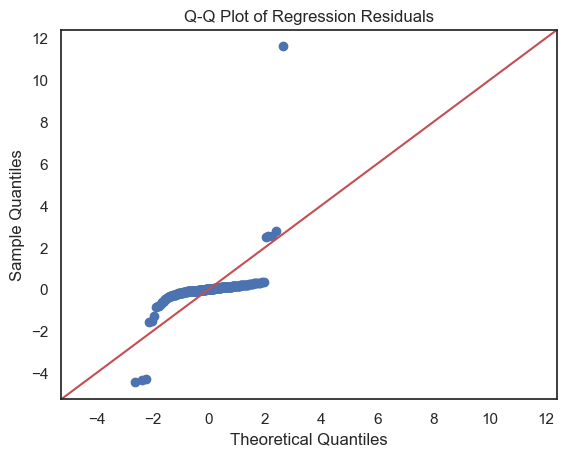

In [234]:
# Q-Q plot of residuals
sm.qqplot(model1.resid, line='45', fit=True)
plt.title("Q-Q Plot of Regression Residuals")
plt.show()

### Most of the points lie along the 45° red line, indicating that the regression's residuals are approximately normally distributed.

### However, there are some deviation in the tails (especially top-right), which suggests slight skewness or potential outliers.

### But overall, normality seems mostly satisfied.

## Evaluate the model

In [237]:
# Call the metrics.mean_absolute_error function.  
print('Mean Absolute Error (Final):', metrics.mean_absolute_error(y_test, Y_pred))  

# Call the metrics.mean_squared_error function.
print('Mean Square Error (Final):', metrics.mean_squared_error(y_test, Y_pred))  

Mean Absolute Error (Final): 0.8305661708239739
Mean Square Error (Final): 6.794128187694817


### <span style="color: orange;">  On average, the model's predictions for GDP percentage change deviate from the actual values by about 0.830 percent (MAE). This is bad. 

### The average of the squared prediction errors is approximately 6.79 percent (MSE) shows massive predication errors. 

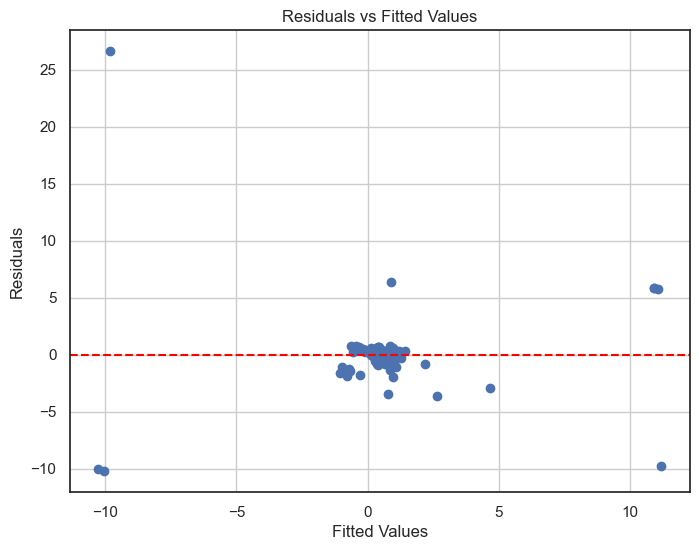

In [239]:
plt.figure(figsize=(8, 6))
plt.scatter(model1.fittedvalues, model1.resid)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.grid(True)
plt.show()

### Observations:

Non-constant spread: Residuals fan out slightly as fitted values increase.

### This suggests heteroscedasticity as the variance of the residuals is not constant across the range of predicted values.

Residuals are more tightly clustered at lower predicted values and more dispersed at higher values.

No strong nonlinearity: There's no clear curve or wave pattern, which implies the model's linear form is likely appropriate (good news!).

## Multiple linear regression: Drop BoE base rate and FTSE 250TR as variables and explore transformation of dependent variable 

# Re-perform MLR without BoE base rate and FTSE 250TR. Transformation of dependent variable not straight forward as it contains negative numbers

In [327]:
# Define the dependent variable
y = regression_df['GDP_pct_change (t=x)']

# Define the independent variable(s)
X = regression_df[
    ['GDP_pct_change (t=x-1)', 'CPI_pct_change (t=x-1)', 'confidence_score (t=x-1)']
]

# Specify the model
mlr = LinearRegression()

# Fit the model
mlr.fit(X, y)

LinearRegression()

In [329]:
# Call the predictions for X (array).
mlr.predict(X)

array([ 5.90437448e-01,  7.49756202e-01,  6.96649951e-01,  6.96649951e-01,
        6.77345281e-01,  5.44579653e-01,  5.37331197e-01,  2.92519503e-01,
        3.38377299e-01,  2.78022592e-01,  9.54075712e-01,  1.03373509e+00,
        1.00355774e+00,  9.33745238e-01,  9.56674136e-01,  1.03995774e+00,
        8.60308512e-01,  7.43223326e-01,  8.79613182e-01,  7.47315506e-01,
        8.00421757e-01,  6.64031901e-01,  5.86892084e-01,  6.43622563e-01,
        6.06196755e-01,  6.73799917e-01,  5.41034289e-01,  5.71211642e-01,
        7.97823334e-01,  6.15575682e-01,  7.18163957e-01,  3.61385061e-01,
        3.45704618e-01,  2.04507003e-01,  1.59753875e-01,  2.81646820e-01,
        2.96143731e-01,  3.14422597e-01,  4.43563997e-01,  4.82173338e-01,
        3.60280393e-01,  5.97640237e-02,  1.09246047e-01,  2.85271048e-01,
        2.81646820e-01,  3.66113956e-01,  5.34890501e-01,  5.26458514e-01,
        5.49387412e-01,  5.57740535e-01,  5.45684320e-01,  4.96202297e-01,
        5.48203880e-01,  

In [331]:
# Checking the value of R-squared, intercept and coefficients.
# For linear regression models in scikit-learn, the score() method returns the R-squared (coefficient of determination) value.

print("R-squared: ", mlr.score(X, y))
print("Intercept: ", mlr.intercept_)
print("Coefficients:")

list(zip(X, mlr.coef_))

# The zip() function in the list(zip(X, multi.coef_)) line is used to pair corresponding elements from two iterable objects (in this case, X and multi.coef_).

R-squared:  0.3804418802774172
Intercept:  0.40156702063652266
Coefficients:


[('GDP_pct_change (t=x-1)', 0.614593745165015),
 ('CPI_pct_change (t=x-1)', -0.22928897913232368),
 ('confidence_score (t=x-1)', -0.026553125650884312)]

Observations: 

- R-squared:  0.38: not amazing but not random. 
- ('GDP_pct_change (t=x-1)', 0.614593745165015): momentum
- ('CPI_pct_change (t=x-1)', -0.22928897913232368): [ ]
- ('confidence_score (t=x-1)', -0.026553125650884312)], [ ]

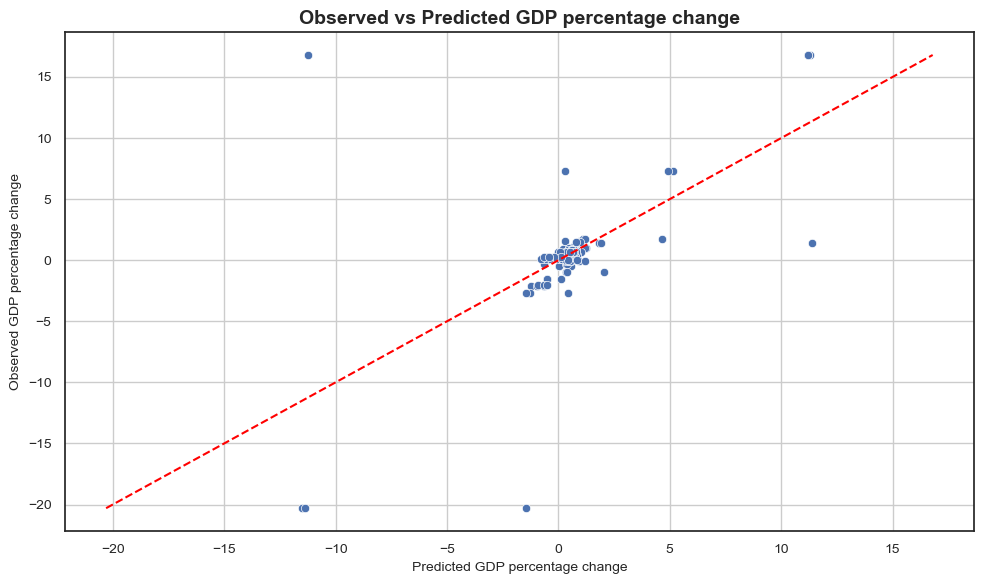

In [334]:
# Plot observed vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=mlr.predict(X), y=regression_df['GDP_pct_change (t=x)'])

# Add Line of best fit (y = x)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')

# Axis labels
plt.xlabel('Predicted GDP percentage change', fontsize=10)
plt.ylabel('Observed GDP percentage change', fontsize=10)

# Title
plt.title('Observed vs Predicted GDP percentage change', fontsize=14, fontweight='bold')

# Tick label size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Final layout
plt.grid(True)
plt.tight_layout()
plt.show()

### Training and testing subsets with MLR

In [337]:
# Create train and test data sets.
# Split the data in 'train' (80%) and 'test' (20%) sets, which is the recommended ratio to prevent overfitting
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [339]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model3 = sm.OLS(y_train, sm.add_constant(x_train)).fit()

# Set the predicted response vector i.e. calculate and store the model's predictions for the target variable (y) based on the test data.
Y_pred = model3.predict(sm.add_constant(x_test)) 
# sm.add_constant(x_test): This adds a constant term (intercept) to the x_test data. This is important because the model was trained with a constant, so it expects input data to also have a constant term for predictions.

# Call a summary of the model.
print_model = model3.summary()

# Print the summary.
print(print_model)  

                             OLS Regression Results                             
Dep. Variable:     GDP_pct_change (t=x)   R-squared:                       0.401
Model:                              OLS   Adj. R-squared:                  0.393
Method:                   Least Squares   F-statistic:                     51.24
Date:                  Sun, 18 May 2025   Prob (F-statistic):           2.11e-25
Time:                          22:36:58   Log-Likelihood:                -526.97
No. Observations:                   234   AIC:                             1062.
Df Residuals:                       230   BIC:                             1076.
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
cons

### Similar R-squared and adj. R-square as before.  however there is still signs of strong heteroskedasticity

In [299]:
# Check multicollinearity.
# Why need to keep adding constant? Because we're using the Statsmodel library, which requires us to do so, 
# whereas the Scikit-learn already assumes that the regression has a constant by default
x_temp = sm.add_constant(x_train)

# Create an empty DataFrame. 
vif = pd.DataFrame()

# Calculate the VIF for each value.
vif['VIF Factor'] = [variance_inflation_factor(x_temp.values,
                                               i) for i in range(x_temp.values.shape[1])]

# Create the feature columns.
vif['features'] = x_temp.columns

# Print the values to one decimal points.
print(vif.round(1))

   VIF Factor                  features
0         2.7                     const
1         1.0    GDP_pct_change (t=x-1)
2         1.8    CPI_pct_change (t=x-1)
3         1.8  confidence_score (t=x-1)


### No multicollinearity observed from the VIF output

In [302]:
# Determine heteroscedasticity.
model4 = sms.het_breuschpagan(model3.resid, model3.model.exog)

In [342]:
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model4)))

{'LM stat': 68.02069598960023, 'LM Test p-value': 1.1324099896655715e-14, 'F-stat': 31.41909804334761, 'F-test p-value': 4.6430813605642015e-17}


### Very small p-value: strong evidence against the null hypothesis of homoskedasticity.

# Note to self: tried to log transform the dependent variable BUT didn't work because GDP dataset contains negative numbers

# Given that the homoskedasticity assumption of MLR does not hold, these could lead to inconsistent / inaccurate hypothesis testing and variable significance interpretations, therefore multiple linear regression is likely not the best ML model to describe inflation. We will explore Random Forest / XGBoost next

In [346]:
regression_df.describe()

,Date,GDP_pct_change (t=x),GDP_pct_change (t=x-1),BoE_base_rate (t=x-1),CPI_pct_change (t=x-1),confidence_score (t=x-1),ftse_250_total_return (t=x-1)
count,293,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,2010-10-06 14:49:33.378839552,0.531058,0.532423,2.311598,2.168259,-11.276451,8110.319639
min,1998-10-01 00:00:00,-20.300000,-20.300000,0.175000,-0.100000,-49.000000,1934.619995
25%,2004-10-01 00:00:00,0.300000,0.300000,0.356579,1.200000,-19.000000,3215.560000
50%,2010-11-01 00:00:00,0.600000,0.600000,0.568421,1.900000,-8.000000,6429.290000
75%,2016-10-01 00:00:00,0.800000,0.800000,4.645833,2.700000,-2.000000,12509.235960
max,2022-10-01 00:00:00,16.800000,16.800000,7.312500,10.100000,8.000000,19395.493530
std,NaN,3.000004,2.999990,2.268643,1.607980,12.277695,5019.938460


In [348]:
regression_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 293 entries, 106 to 398
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date                           293 non-null    datetime64[ns]
 1   GDP_pct_change (t=x)           293 non-null    float64       
 2   GDP_pct_change (t=x-1)         293 non-null    float64       
 3   BoE_base_rate (t=x-1)          293 non-null    float64       
 4   CPI_pct_change (t=x-1)         293 non-null    float64       
 5   confidence_score (t=x-1)       293 non-null    float64       
 6   ftse_250_total_return (t=x-1)  293 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 18.3 KB


In [350]:
regression_df.head()

,Date,GDP_pct_change (t=x),GDP_pct_change (t=x-1),BoE_base_rate (t=x-1),CPI_pct_change (t=x-1),confidence_score (t=x-1),ftse_250_total_return (t=x-1)
106,1998-10-01,0.7,0.7,7.3125,1.4,-3.0,1964.989990
107,1998-11-01,0.7,0.7,7.2500,1.4,-9.0,2084.610107
108,1998-11-01,0.7,0.7,6.7500,1.4,-7.0,2127.800049
109,1998-12-01,0.7,0.7,6.7500,1.4,-7.0,2127.800049
110,1999-01-01,0.7,0.7,6.2500,1.6,-8.0,2111.929932


Root Mean Squared Error: 2.3216
Mean Squared Error: 5.3900
Mean Absolute Error: 0.6419
R² Score: 0.4291


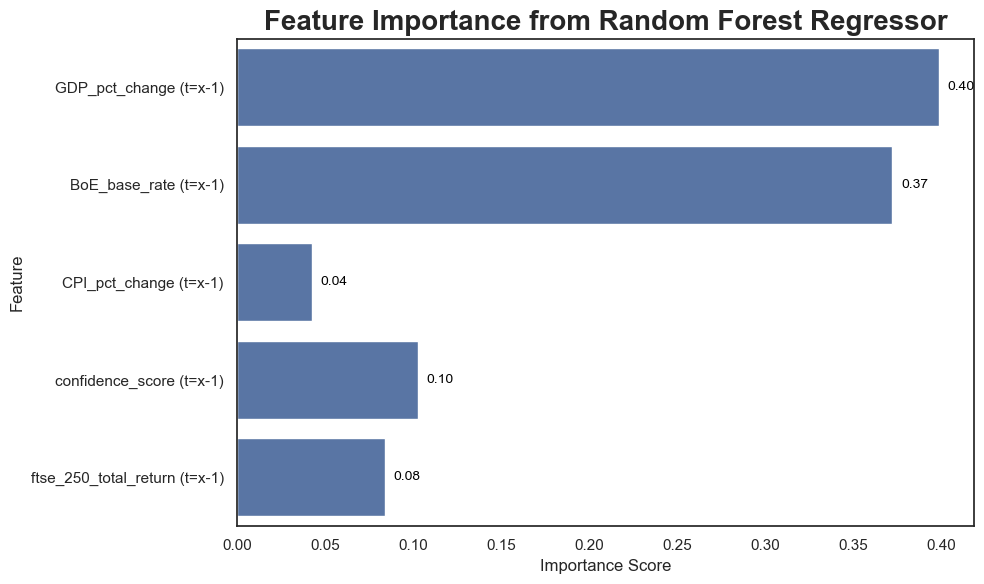

In [352]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  # Import pandas

# 1. Prepare the data
# -------------------
# Use only non-null rows
regression_df = regression_df.dropna(
    subset= ['GDP_pct_change (t=x)','GDP_pct_change (t=x-1)', 'BoE_base_rate (t=x-1)', 
     'CPI_pct_change (t=x-1)', 'confidence_score (t=x-1)','ftse_250_total_return (t=x-1)']
)

# Define features and target
X = regression_df[
    ['GDP_pct_change (t=x-1)', 'BoE_base_rate (t=x-1)', 
     'CPI_pct_change (t=x-1)', 'confidence_score (t=x-1)', 'ftse_250_total_return (t=x-1)']
]
y = regression_df['GDP_pct_change (t=x)']

# 2. Train-test split
# -------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Build and train the Random Forest model
# ------------------------------------------
rf_model = RandomForestRegressor(
    n_estimators=200,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    n_jobs=-1,
    random_state=42,
)

rf_model.fit(X_train, y_train)

# 4. Predictions and Evaluation
# -----------------------------
y_pred = rf_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# 5. Feature Importance Plot
# --------------------------
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=feature_importances, y=feature_importances.index)  # Save the axes object
plt.title(
    "Feature Importance from Random Forest Regressor", fontsize=20, fontweight='bold'
)
plt.xlabel("Importance Score")
plt.ylabel("Feature")

# Add value labels to the right of each bar
for i, (value, name) in enumerate(zip(feature_importances, feature_importances.index)):
    ax.text(
        value + 0.005, i, f"{value:.2f}", color='black', va='center', fontsize=10
    )  # Use the saved 'ax'
plt.tight_layout()
plt.show()

Observation: 
Predicting with this model is very low at only 42.9% R squared sore
Preductions are off by 0.64% (MAE)
Root Mean Squared Error: 2.3216 - there are a few big errors
MSE shows large errors are heavily penalised. 

This is not a very strong predictor for % GDP. R2 suggestes this is underfitting. 

Root Mean Squared Error: 2.1529
Mean Squared Error: 4.6351
Mean Absolute Error: 0.5129
R² Score: 0.5091


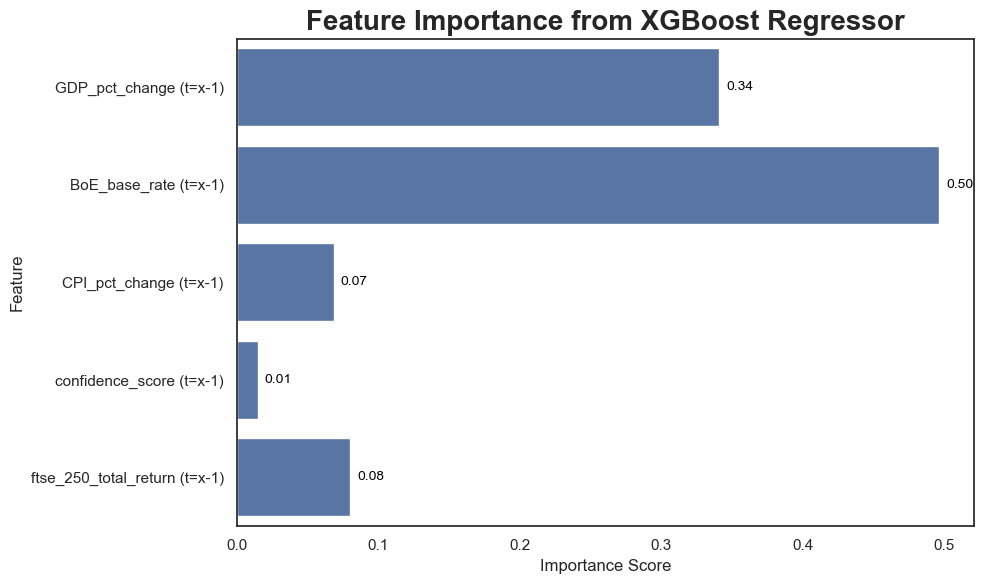

In [356]:
!pip install xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Prepare the data
# -------------------
# Use only non-null rows
regression_df = regression_df.dropna(
    subset= ['GDP_pct_change (t=x)','GDP_pct_change (t=x-1)', 'BoE_base_rate (t=x-1)', 
     'CPI_pct_change (t=x-1)', 'confidence_score (t=x-1)','ftse_250_total_return (t=x-1)']
)

# Define features and target
X = regression_df[
    ['GDP_pct_change (t=x-1)', 'BoE_base_rate (t=x-1)', 
     'CPI_pct_change (t=x-1)', 'confidence_score (t=x-1)', 'ftse_250_total_return (t=x-1)']
]
y = regression_df['GDP_pct_change (t=x)']

# 2. Train-test split
# -------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# 3. Initialize and train XGBoost model
# -------------------------------------
xgb_model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',  # use squared error for regression
    random_state=42
)

xgb_model.fit(X_train, y_train)

# 4. Predict and evaluate
# -----------------------
y_pred = xgb_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")
# 5. Plot feature importance
# --------------------------
feature_importance = pd.Series(xgb_model.feature_importances_, index=X.columns)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=feature_importance, y=feature_importance.index)

plt.title("Feature Importance from XGBoost Regressor", fontsize=20, fontweight='bold')
plt.xlabel("Importance Score")
plt.ylabel("Feature")

# Add value labels to the right of each bar
for i, (value, name) in enumerate(zip(feature_importance, feature_importance.index)):
    ax.text(value + 0.005, i, f"{value:.2f}", color='black', va='center', fontsize=10)

plt.tight_layout()
plt.show()

Observation: 
Better fitting versus the random forest

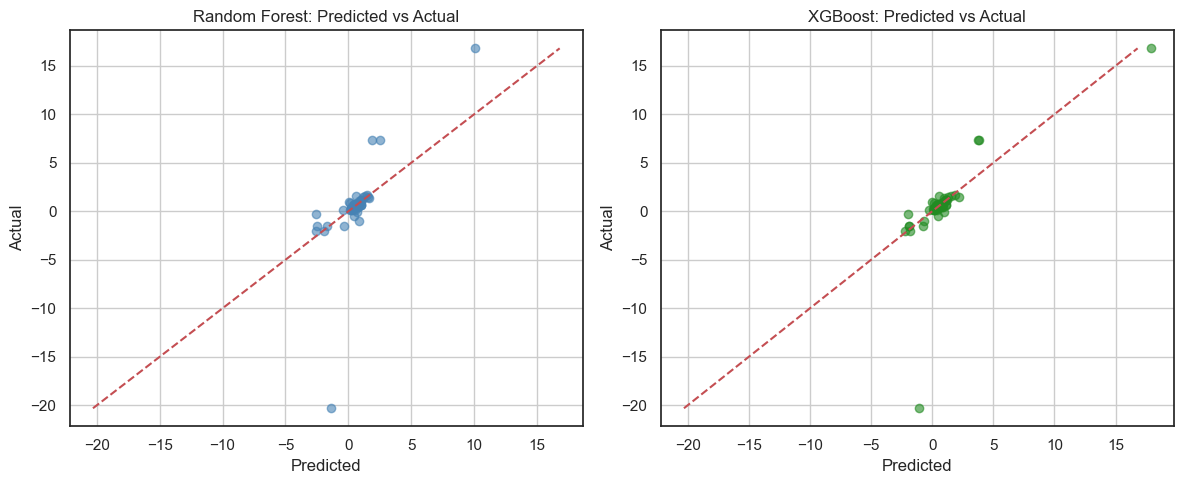

In [317]:
# --- Random Forest Predictions ---
rf_preds = rf_model.predict(X_test)

# --- XGBoost Predictions ---
xgb_preds = xgb_model.predict(X_test)

# --- Plot Predictions vs Actuals ---
plt.figure(figsize=(12, 5))

# Random Forest subplot
plt.subplot(1, 2, 1)
plt.scatter(rf_preds, y_test, alpha=0.6, color='steelblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest: Predicted vs Actual")
plt.grid(True)

# XGBoost subplot
plt.subplot(1, 2, 2)
plt.scatter(xgb_preds, y_test, alpha=0.6, color='forestgreen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost: Predicted vs Actual")
plt.grid(True)

plt.tight_layout()
plt.show()

#### Both Random Forest and XGBoost models are only relatively good predictors for GDP. 

GDP 1998-22 Overall reflection:

